In [1]:
import string
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from britain_elects_utils import (parties,
                                  read_data,
                                  process_wvi_data,
                                  null_values_plot,
                                  plot_vote_intention)
from polling_report_history import read_historical_polling_report
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("./britain_elects_all/britain_elects_all.csv", index_col=0)
chars_to_keep = string.ascii_letters + string.digits + "%- "
df["full_text"] = df["full_text"].str.replace("\n", " ")
df["full_text"] = df["full_text"].apply(lambda x: ''.join([char for char in x if char in chars_to_keep]).lower())

In [3]:
wcloud = wordcloud.WordCloud(background_color='white', width=1500, height=800).generate(' '.join(df["full_text"]))

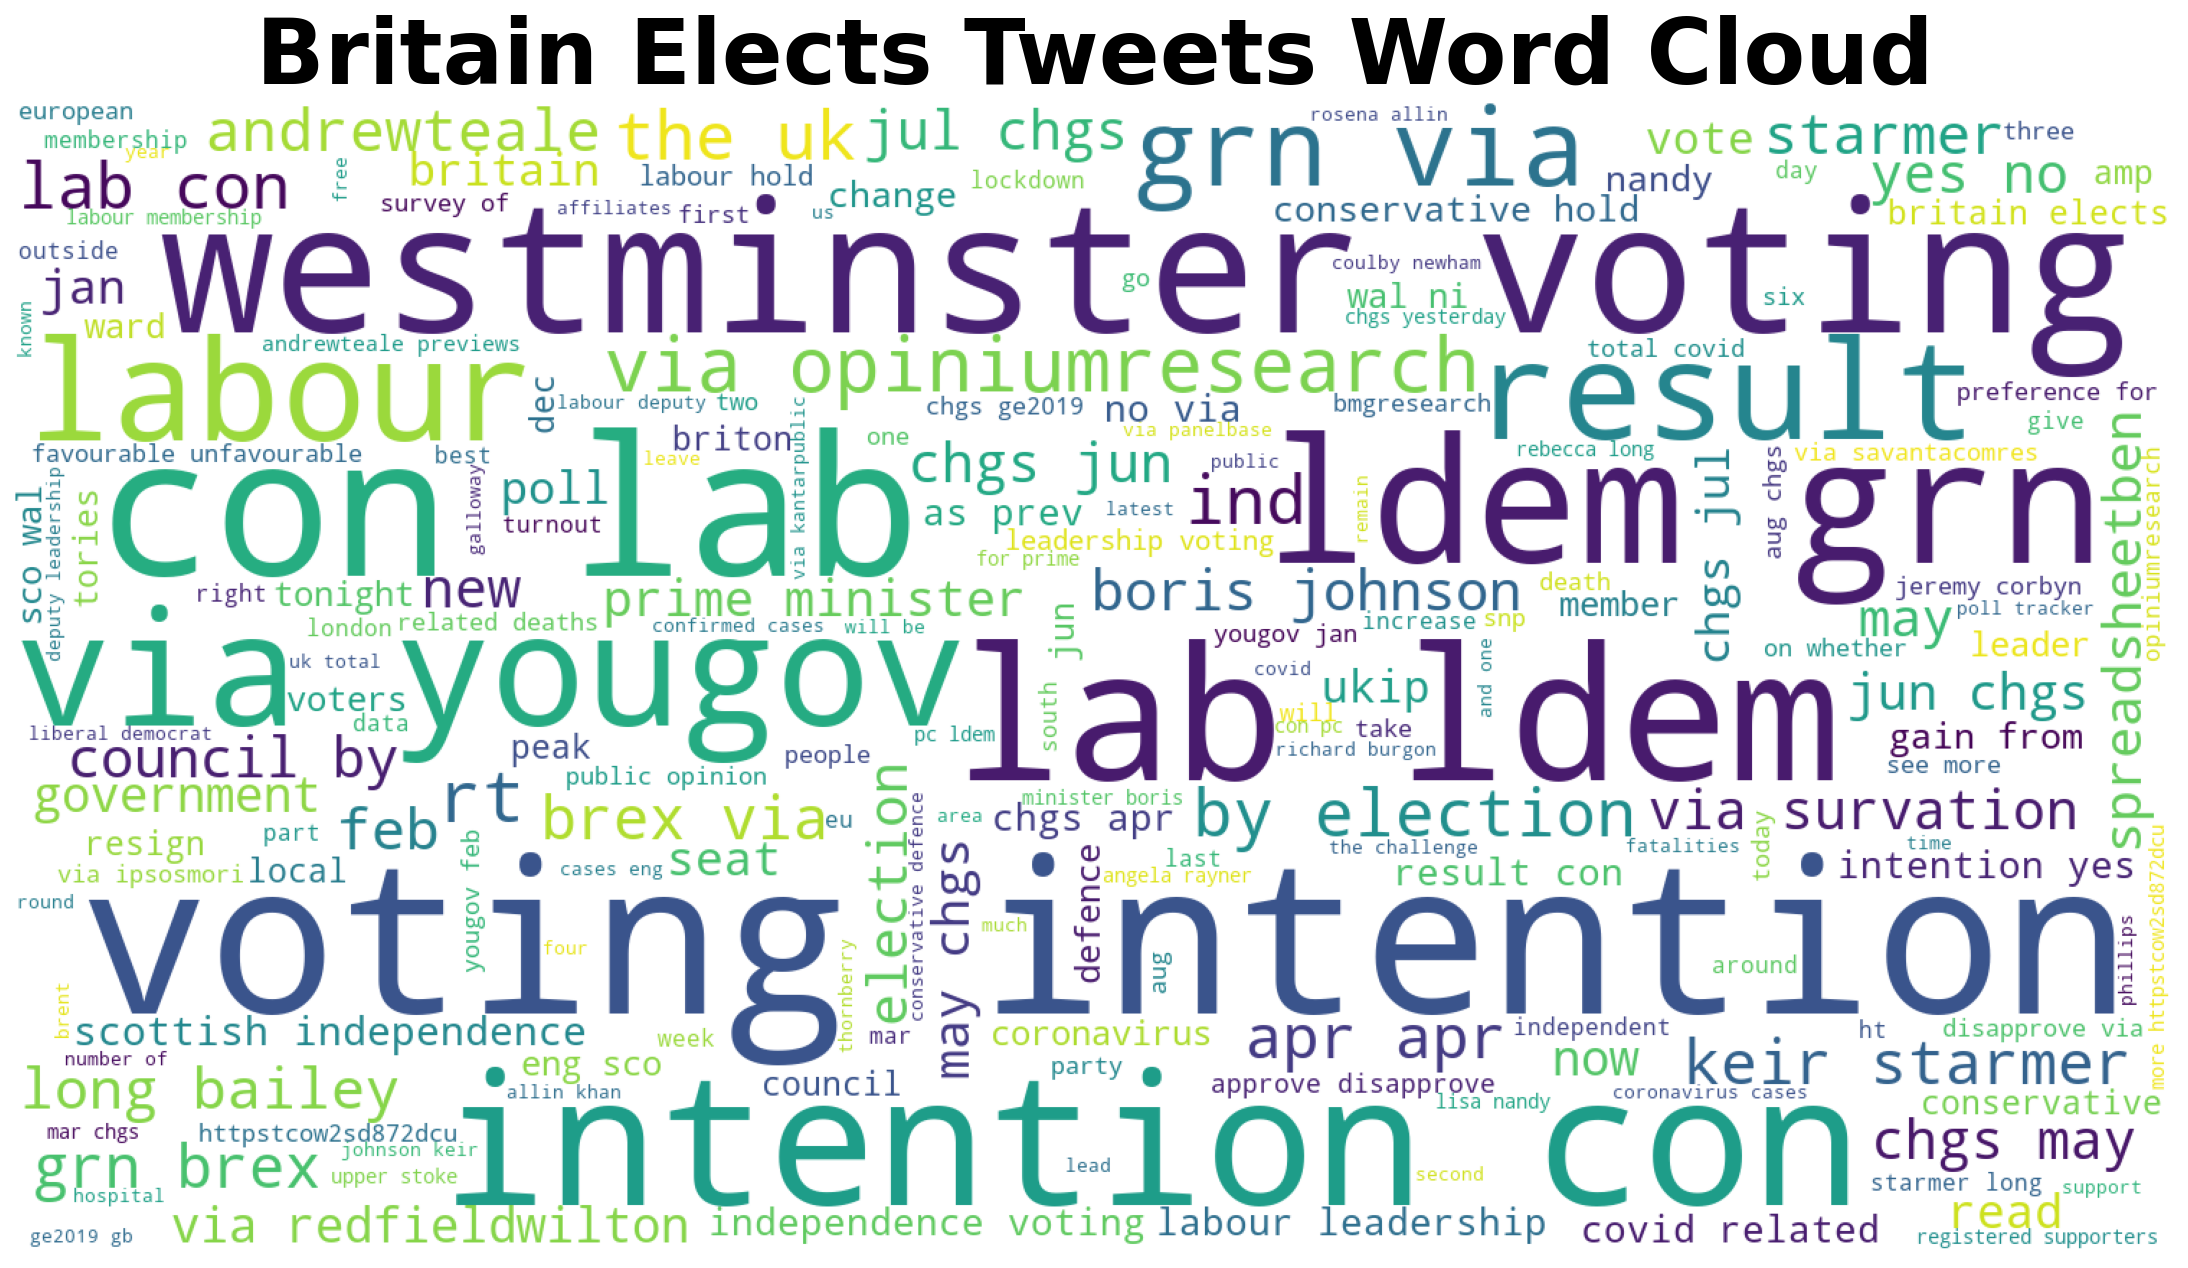

In [4]:
plt.figure(figsize=(15, 8), facecolor=None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.title("Britain Elects Tweets Word Cloud", fontweight="bold", fontsize=45);

In [5]:
df = read_data("britain_elects_wvi_data")
df = process_wvi_data(df)

In [6]:
df.tail()

created_at           source      start  \
date                                                                  
2020-08-05 00:00:00 2020-08-07 12:45:29           YouGov 2020-08-04   
2020-08-15 19:27:37 2020-08-15 19:27:37  OpiniumResearch        NaT   
2020-08-16 00:00:00 2020-08-19 09:56:28    SavantaComRes 2020-08-14   
2020-08-19 00:00:00 2020-08-19 16:29:14           YouGov 2020-08-18   
2020-08-19 00:00:00 2020-08-20 17:56:37   RedfieldWilton 2020-08-19   

                           end change_info  GRN  GRN_change  LAB  LAB_change  \
date                                                                           
2020-08-05 00:00:00 2020-08-05         NaN  NaN         NaN   36           1   
2020-08-15 19:27:37        NaT         NaN  NaN         NaN   39           1   
2020-08-16 00:00:00 2020-08-16      19 Jul  NaN         NaN   37           0   
2020-08-19 00:00:00 2020-08-19      12 Aug  6.0         1.0   38           3   
2020-08-19 00:00:00 2020-08-19      12 Aug  4.0         1.0   37           1   

                     LDEM  LDEM_change  SNP  SNP_change   CON  CON_change  \
date                                                                        
2020-08-05 00:00:00   8.0          2.0  NaN         NaN  42.0        -1.0   
2020-08-15 19:27:37   5.0         -1.0  NaN         NaN  42.0         1.0   
2020-08-16 00:00:00   7.0          1.0  NaN         NaN  42.0        -1.0   
2020-08-19 00:00:00   6.0          1.0  NaN         NaN  40.0        -4.0   
2020-08-19 00:00:00   7.0         -2.0  NaN         NaN  44.0         1.0   

                     BREX  BREX_change  UKIP  UKIP_change collection_source  
date                                                                         
2020-08-05 00:00:00   NaN          NaN   NaN          NaN     britainelects  
2020-08-15 19:27:37   NaN          NaN   NaN          NaN     britainelects  
2020-08-16 00:00:00   NaN          NaN   NaN          NaN     britainelects  
2020-08-19 00:00:00   4.0          1.0   NaN          NaN     britainelects  
2020-08-19 00:00:00   NaN          NaN   NaN          NaN     britainelects

In [7]:
histo = read_historical_polling_report()
histo.head()

source        end  CON  LAB  LDEM  UKIP  GRN  \
date                                                                
2019-12-11      DeltapollUK 2019-12-11   45   35    10   NaN  3.0   
2019-12-11     KantarPublic 2019-12-11   44   32    13   NaN  3.0   
2019-12-11      BMGResearch 2019-12-11   41   32    14   NaN  3.0   
2019-12-11  OpiniumResearch 2019-12-11   45   33    12   NaN  2.0   
2019-12-11        Panelbase 2019-12-11   43   34    11   NaN  3.0   

           collection_source  
date                          
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh

In [8]:
df = pd.concat([histo, df]).sort_index()
df

source        end   CON  LAB  LDEM  UKIP  GRN  \
date                                                                          
2010-05-13 00:00:00              ICM 2010-05-13  38.0   33  21.0   NaN  NaN   
2010-05-13 00:00:00           ComRes 2010-05-13  38.0   34  21.0   NaN  NaN   
2010-05-14 00:00:00           YouGov 2010-05-14  37.0   34  21.0   NaN  NaN   
2010-05-21 00:00:00           YouGov 2010-05-21  39.0   32  21.0   NaN  NaN   
2010-05-21 00:00:00  OpiniumResearch 2010-05-21  38.0   29  21.0   NaN  NaN   
...                              ...        ...   ...  ...   ...   ...  ...   
2020-08-05 00:00:00           YouGov 2020-08-05  42.0   36   8.0   NaN  NaN   
2020-08-15 19:27:37  OpiniumResearch        NaT  42.0   39   5.0   NaN  NaN   
2020-08-16 00:00:00    SavantaComRes 2020-08-16  42.0   37   7.0   NaN  NaN   
2020-08-19 00:00:00           YouGov 2020-08-19  40.0   38   6.0   NaN  6.0   
2020-08-19 00:00:00   RedfieldWilton 2020-08-19  44.0   37   7.0   NaN  4.0   

                    collection_source          created_at      start  \
date                                                                   
2010-05-13 00:00:00            uk_prh                 NaT        NaT   
2010-05-13 00:00:00            uk_prh                 NaT        NaT   
2010-05-14 00:00:00            uk_prh                 NaT        NaT   
2010-05-21 00:00:00            uk_prh                 NaT        NaT   
2010-05-21 00:00:00            uk_prh                 NaT        NaT   
...                               ...                 ...        ...   
2020-08-05 00:00:00     britainelects 2020-08-07 12:45:29 2020-08-04   
2020-08-15 19:27:37     britainelects 2020-08-15 19:27:37        NaT   
2020-08-16 00:00:00     britainelects 2020-08-19 09:56:28 2020-08-14   
2020-08-19 00:00:00     britainelects 2020-08-19 16:29:14 2020-08-18   
2020-08-19 00:00:00     britainelects 2020-08-20 17:56:37 2020-08-19   

                    change_info  GRN_change  LAB_change  LDEM_change  SNP  \
date                                                                        
2010-05-13 00:00:00         NaN         NaN         NaN          NaN  NaN   
2010-05-13 00:00:00         NaN         NaN         NaN          NaN  NaN   
2010-05-14 00:00:00         NaN         NaN         NaN          NaN  NaN   
2010-05-21 00:00:00         NaN         NaN         NaN          NaN  NaN   
2010-05-21 00:00:00         NaN         NaN         NaN          NaN  NaN   
...                         ...         ...         ...          ...  ...   
2020-08-05 00:00:00         NaN         NaN         1.0          2.0  NaN   
2020-08-15 19:27:37         NaN         NaN         1.0         -1.0  NaN   
2020-08-16 00:00:00      19 Jul         NaN         0.0          1.0  NaN   
2020-08-19 00:00:00      12 Aug         1.0         3.0          1.0  NaN   
2020-08-19 00:00:00      12 Aug         1.0         1.0         -2.0  NaN   

                     SNP_change  CON_change  BREX  BREX_change  UKIP_change  
date                                                                         
2010-05-13 00:00:00         NaN         NaN   NaN          NaN          NaN  
2010-05-13 00:00:00         NaN         NaN   NaN          NaN          NaN  
2010-05-14 00:00:00         NaN         NaN   NaN          NaN          NaN  
2010-05-21 00:00:00         NaN         NaN   NaN          NaN          NaN  
2010-05-21 00:00:00         NaN         NaN   NaN          NaN          NaN  
...                         ...         ...   ...          ...          ...  
2020-08-05 00:00:00         NaN        -1.0   NaN          NaN          NaN  
2020-08-15 19:27:37         NaN         1.0   NaN          NaN          NaN  
2020-08-16 00:00:00         NaN        -1.0   NaN          NaN          NaN  
2020-08-19 00:00:00         NaN        -4.0   4.0          1.0          NaN  
2020-08-19 00:00:00         NaN         1.0   NaN          NaN          NaN  

[2764 rows x 20 columns]

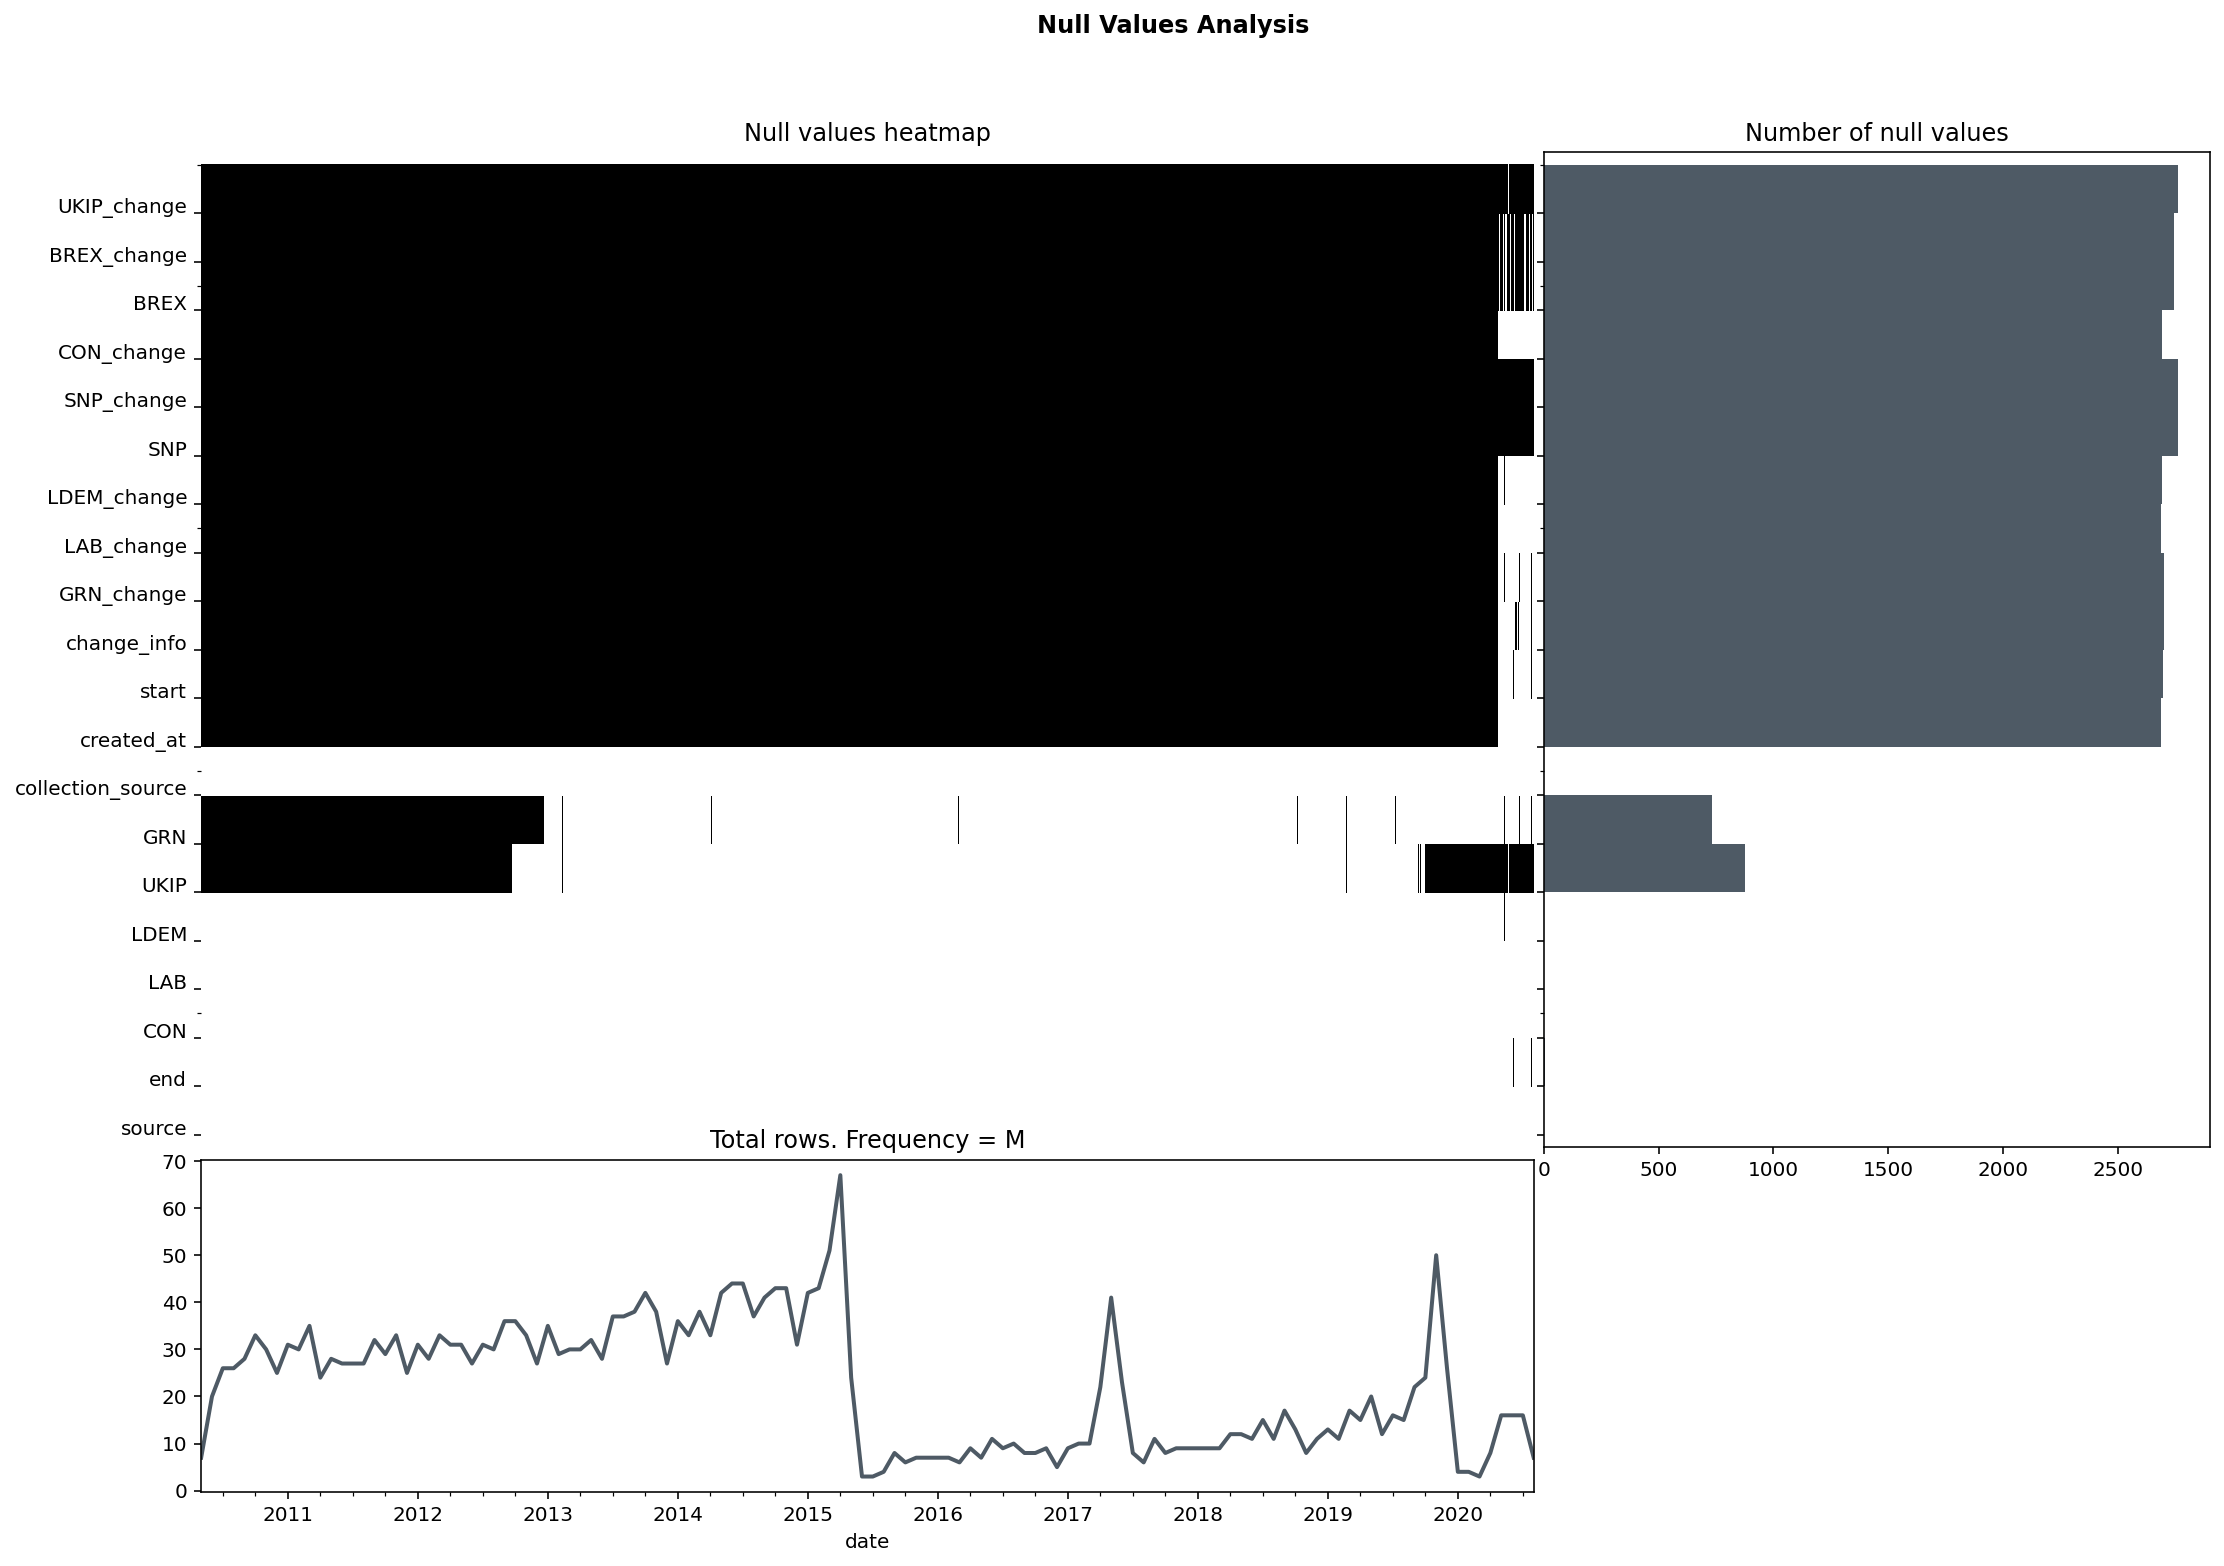

In [9]:
null_values_plot(df)

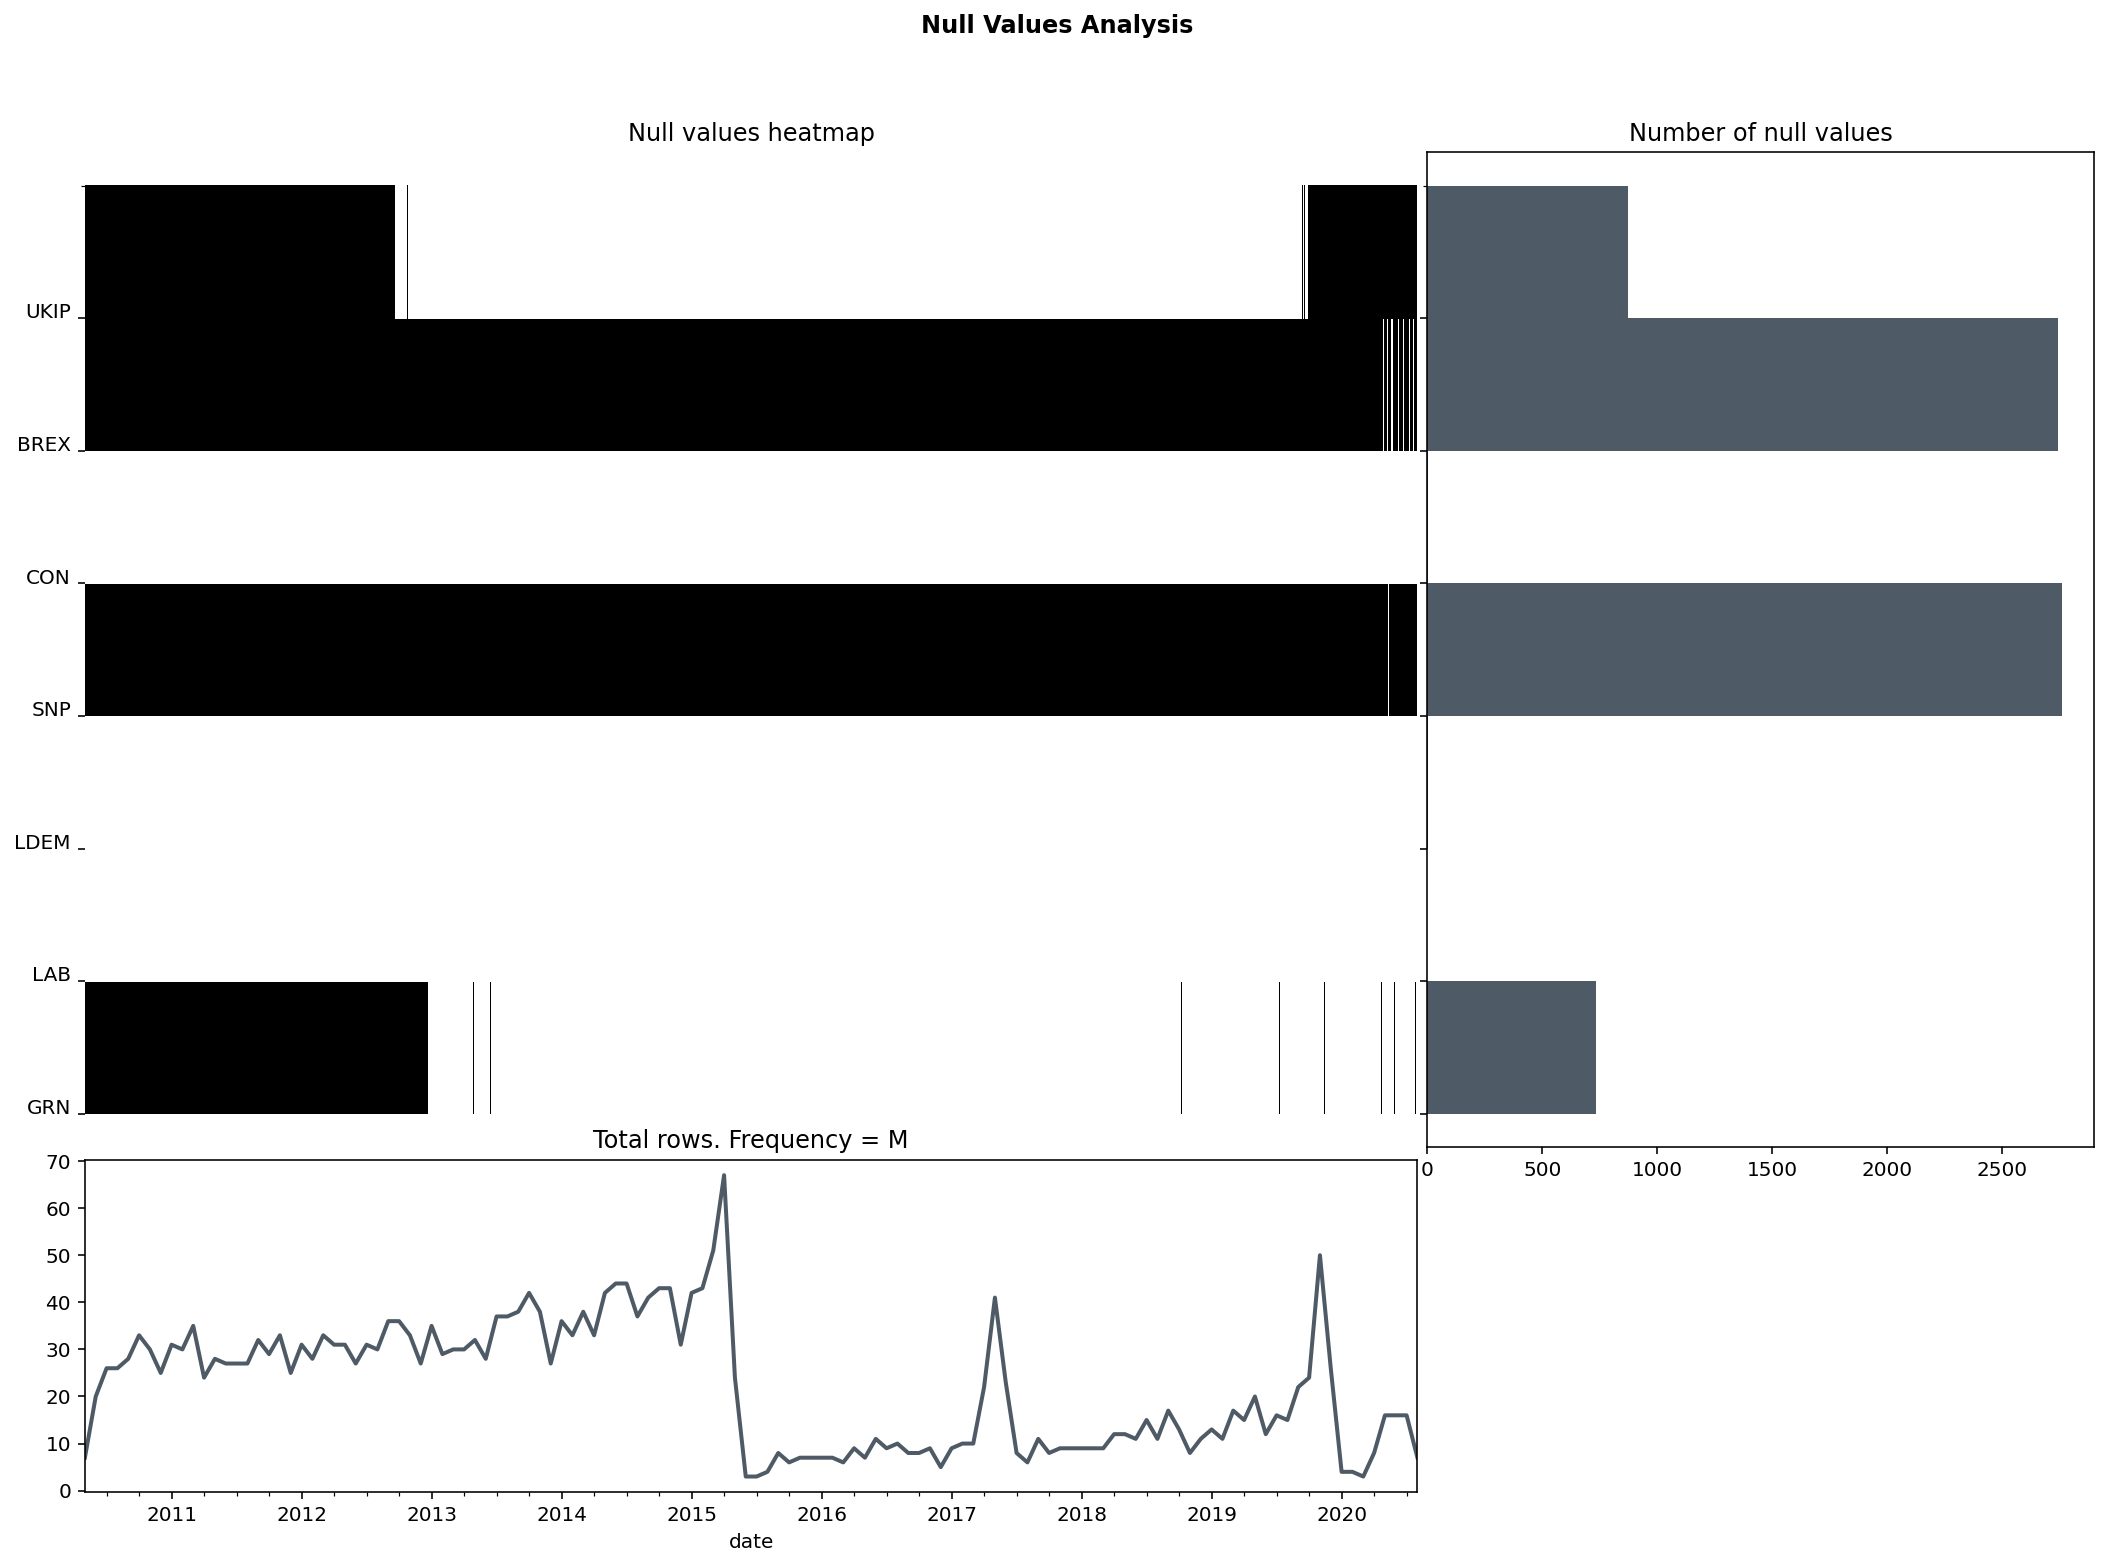

In [10]:
null_values_plot(df[list(parties)])

In [11]:
plt.style.use("fivethirtyeight")

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Westminster Voting Intention'}, xlabel='Date', ylabel='% Poll'>)

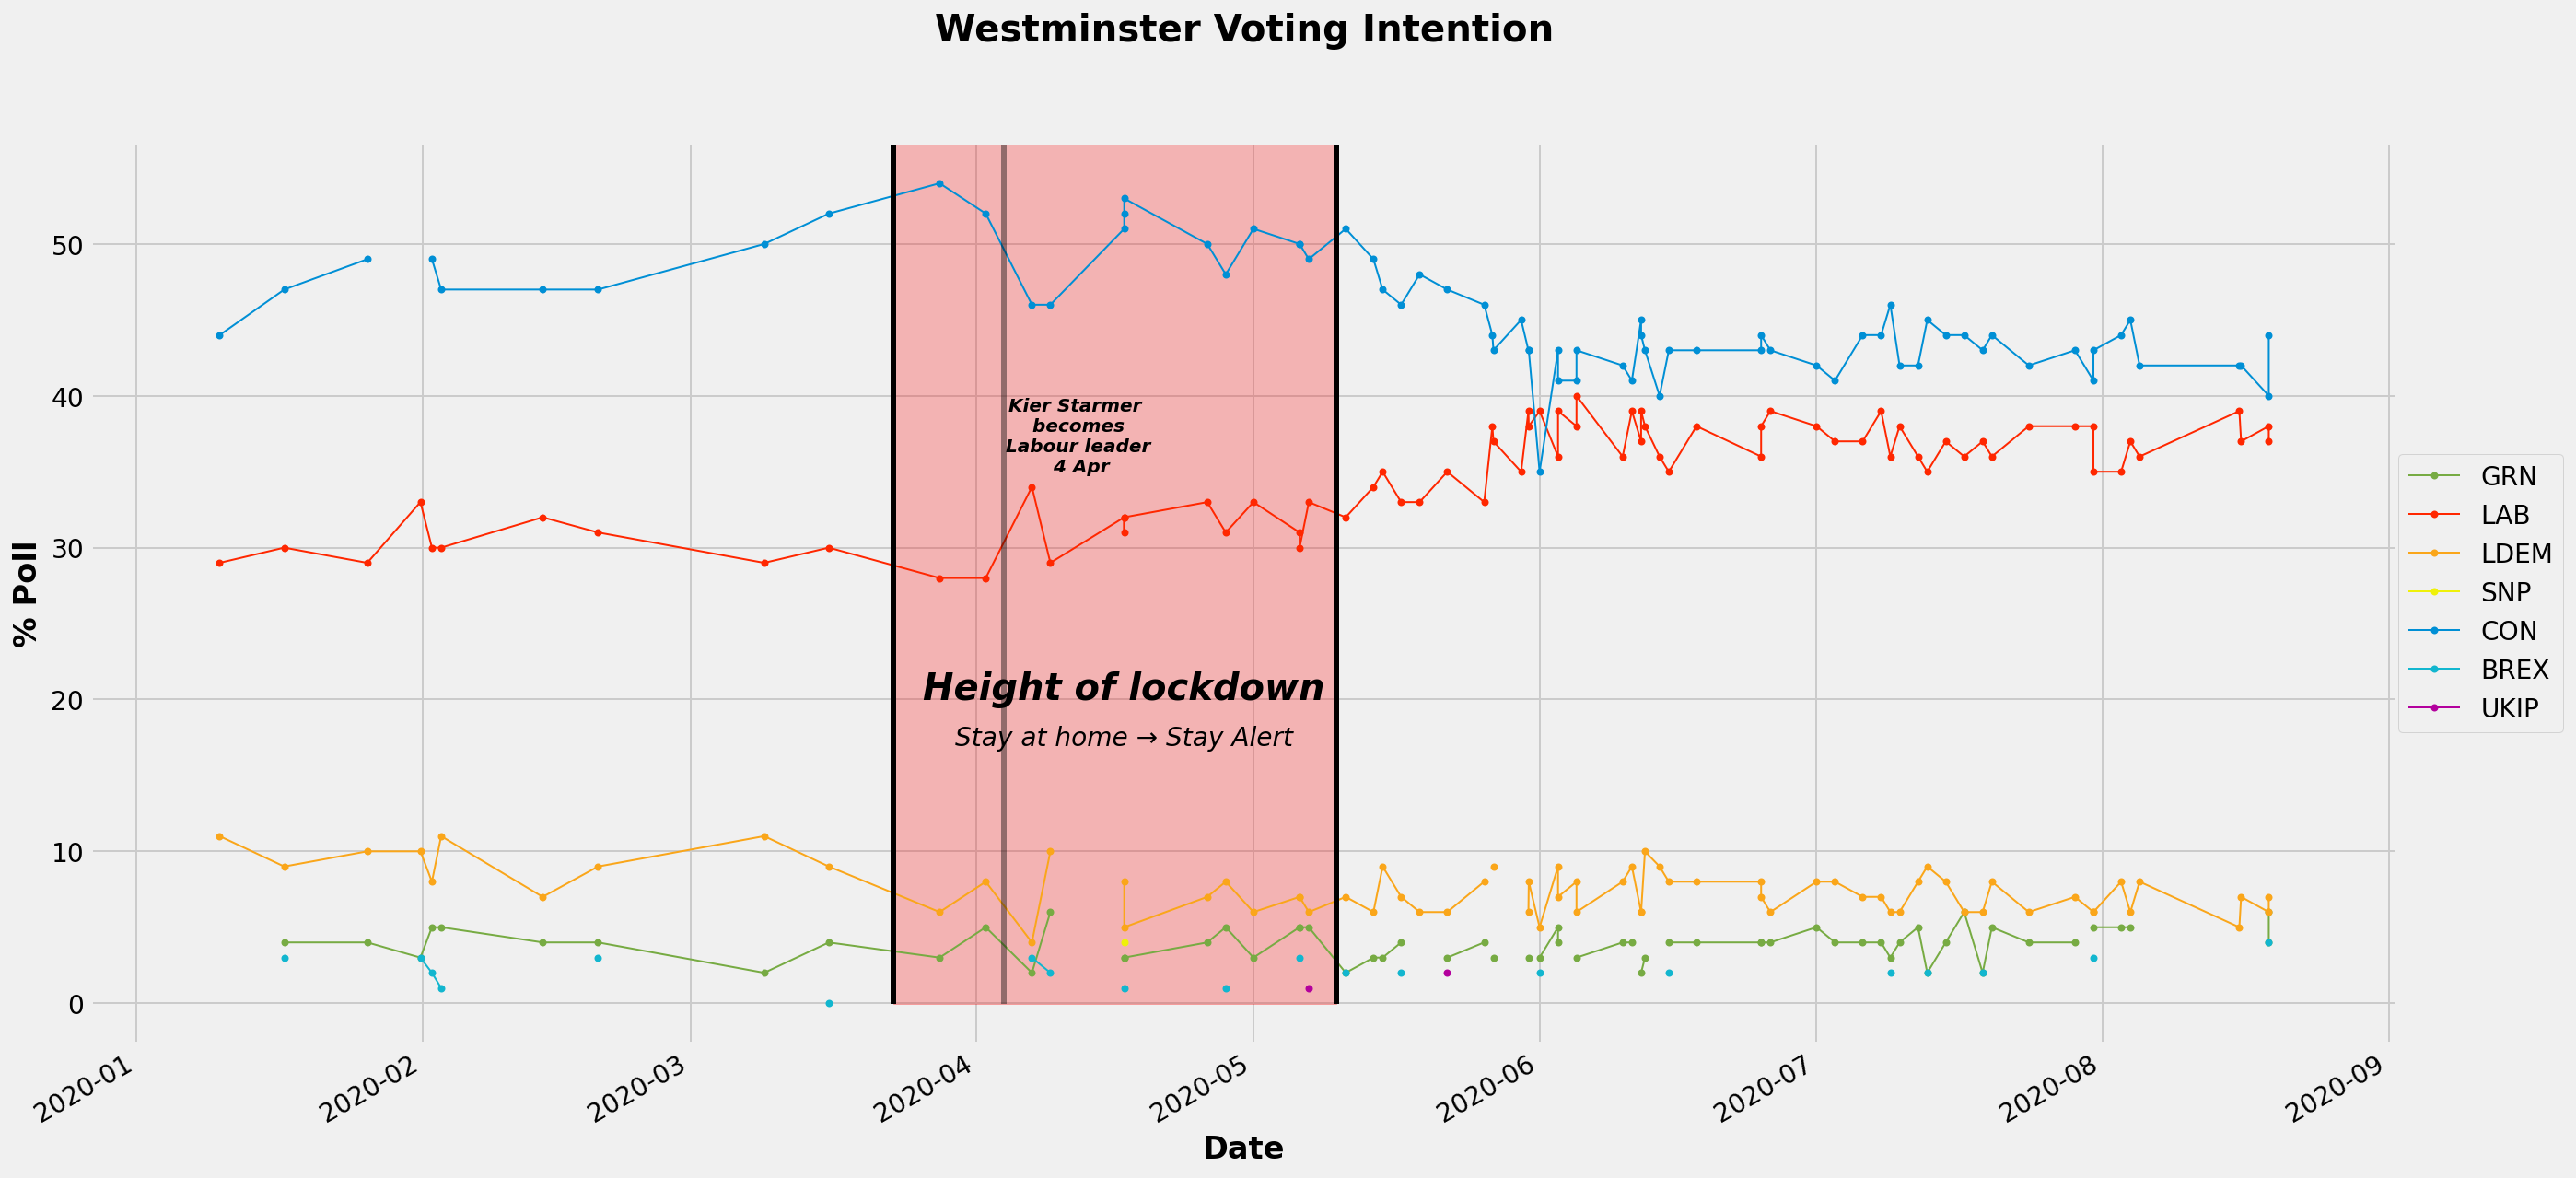

In [12]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], add_lockdown_context=True)

(<Figure size 1440x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'Westminster Voting Intention - Weekly Aggregation'}, xlabel='Date', ylabel='% Poll'>)

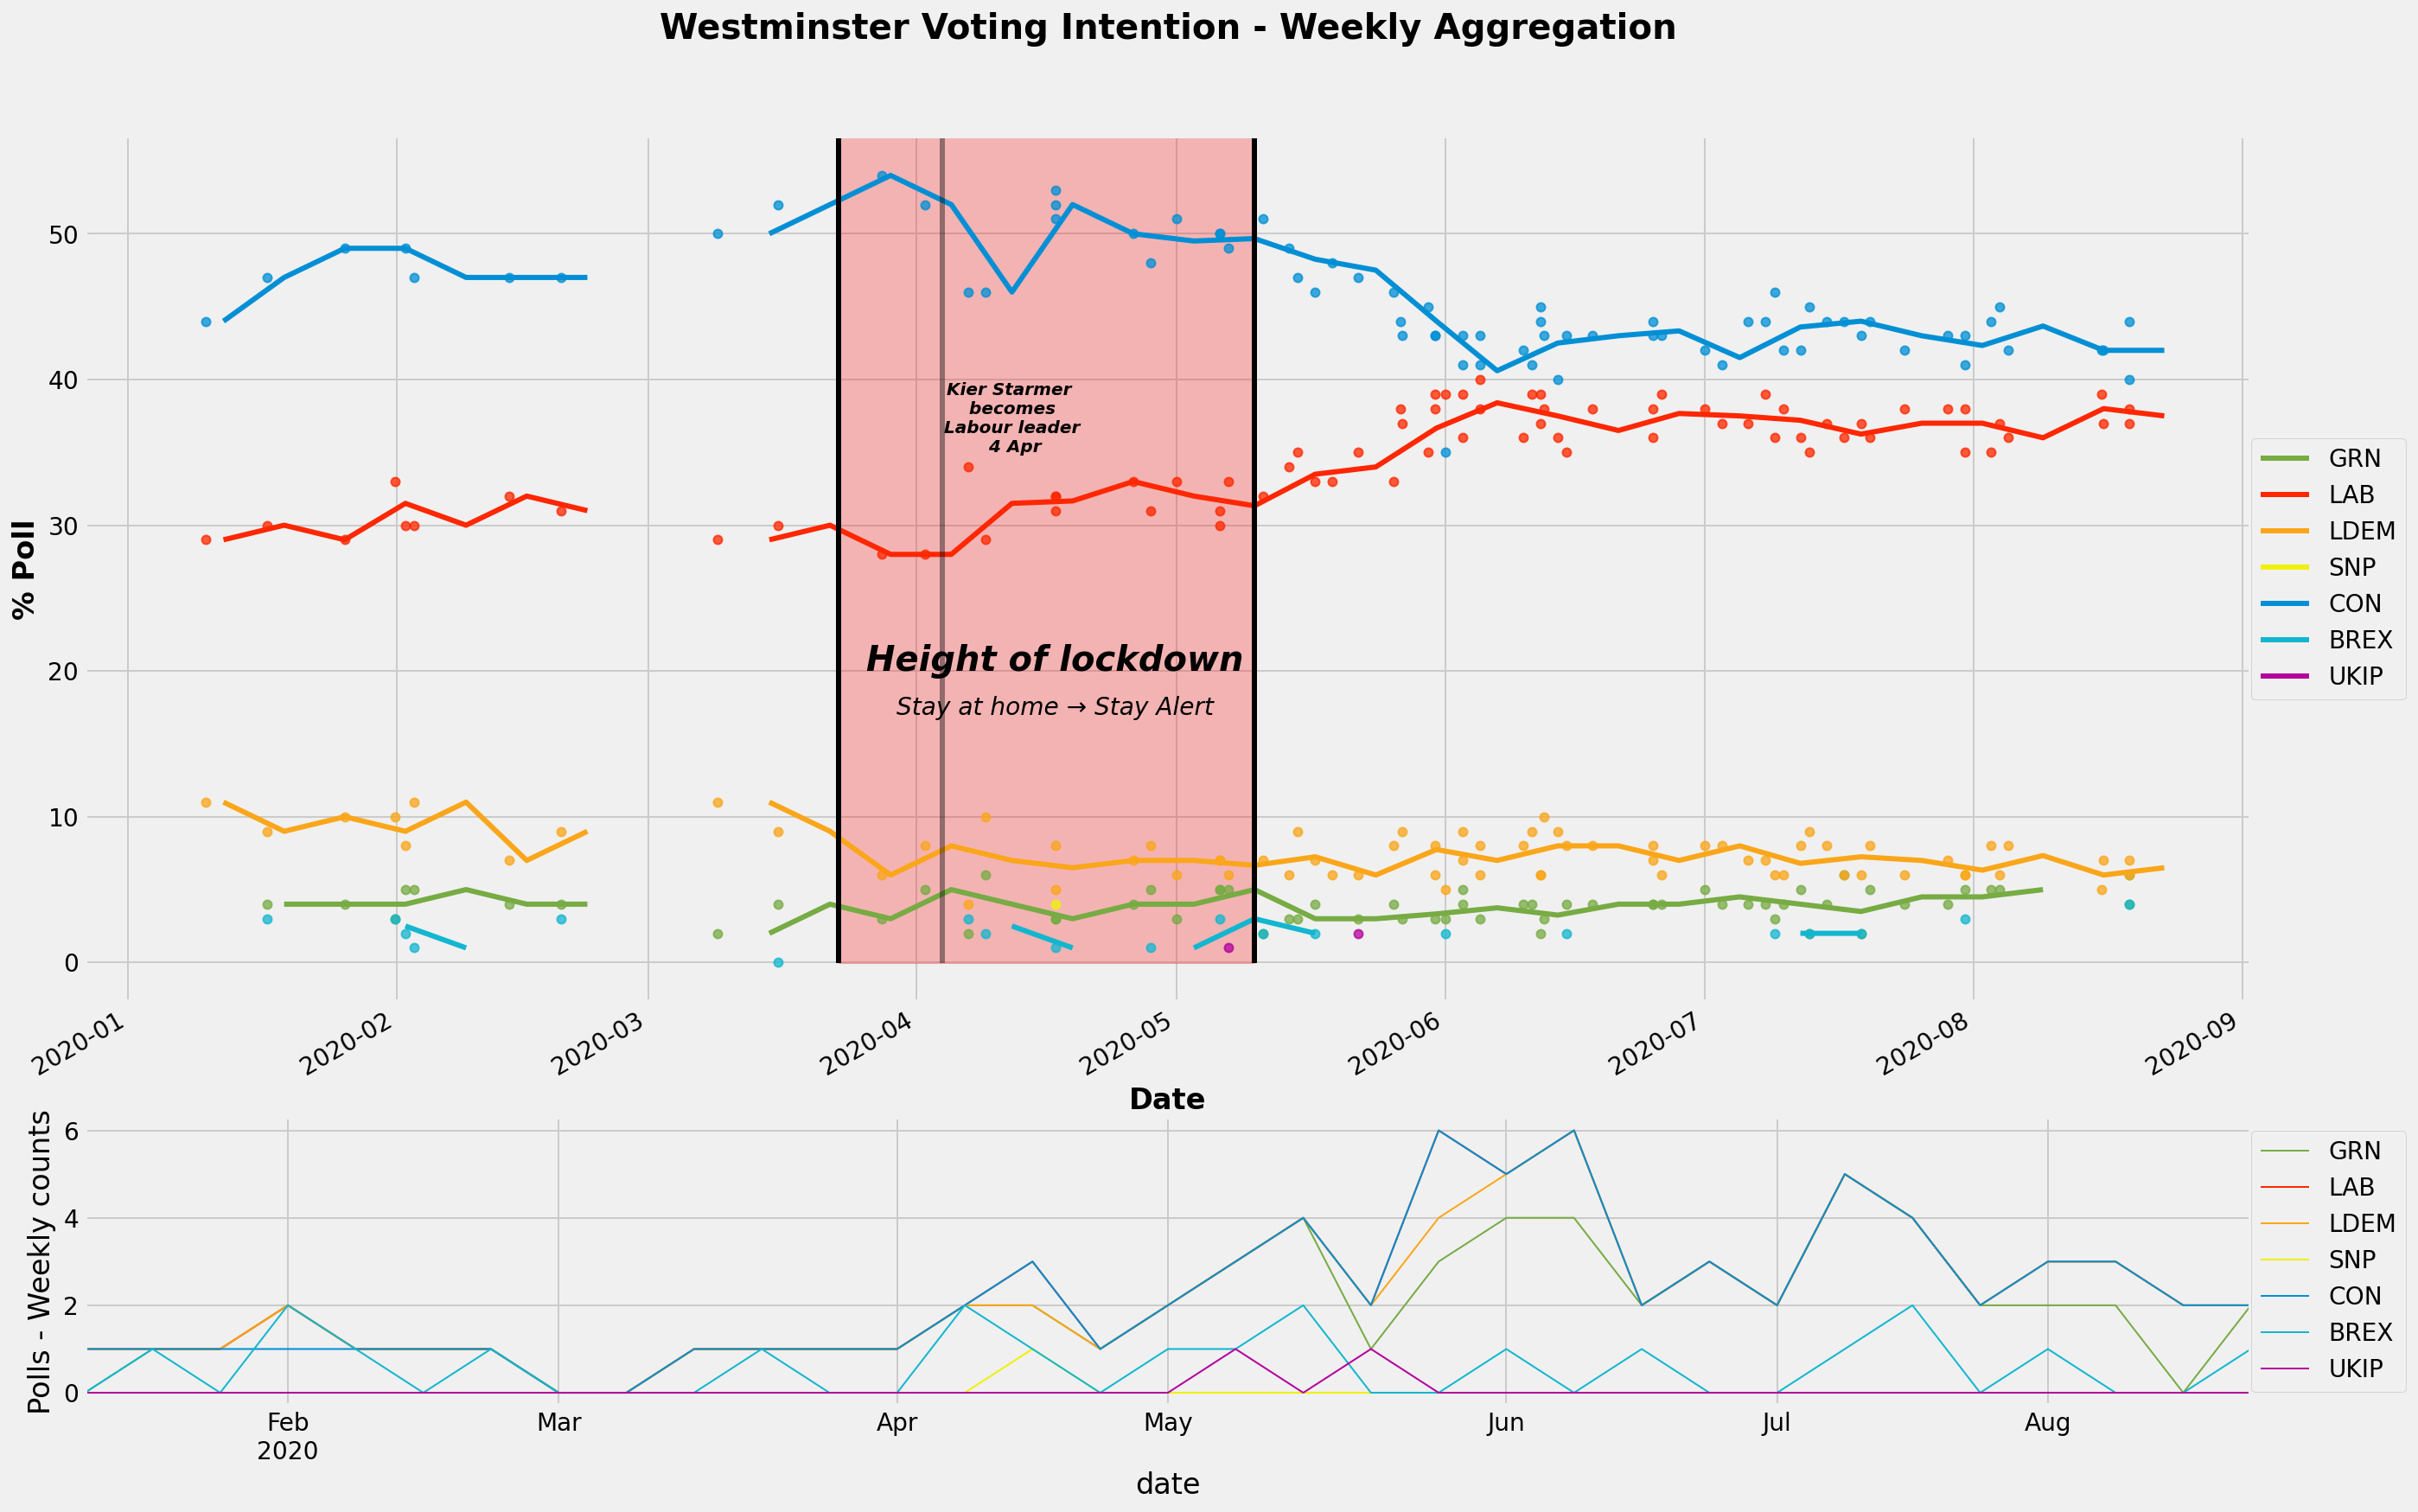

In [13]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], agg="W", add_lockdown_context=True, markersize=5)

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Westminster Voting Intention'}, xlabel='Date', ylabel='% Poll'>)

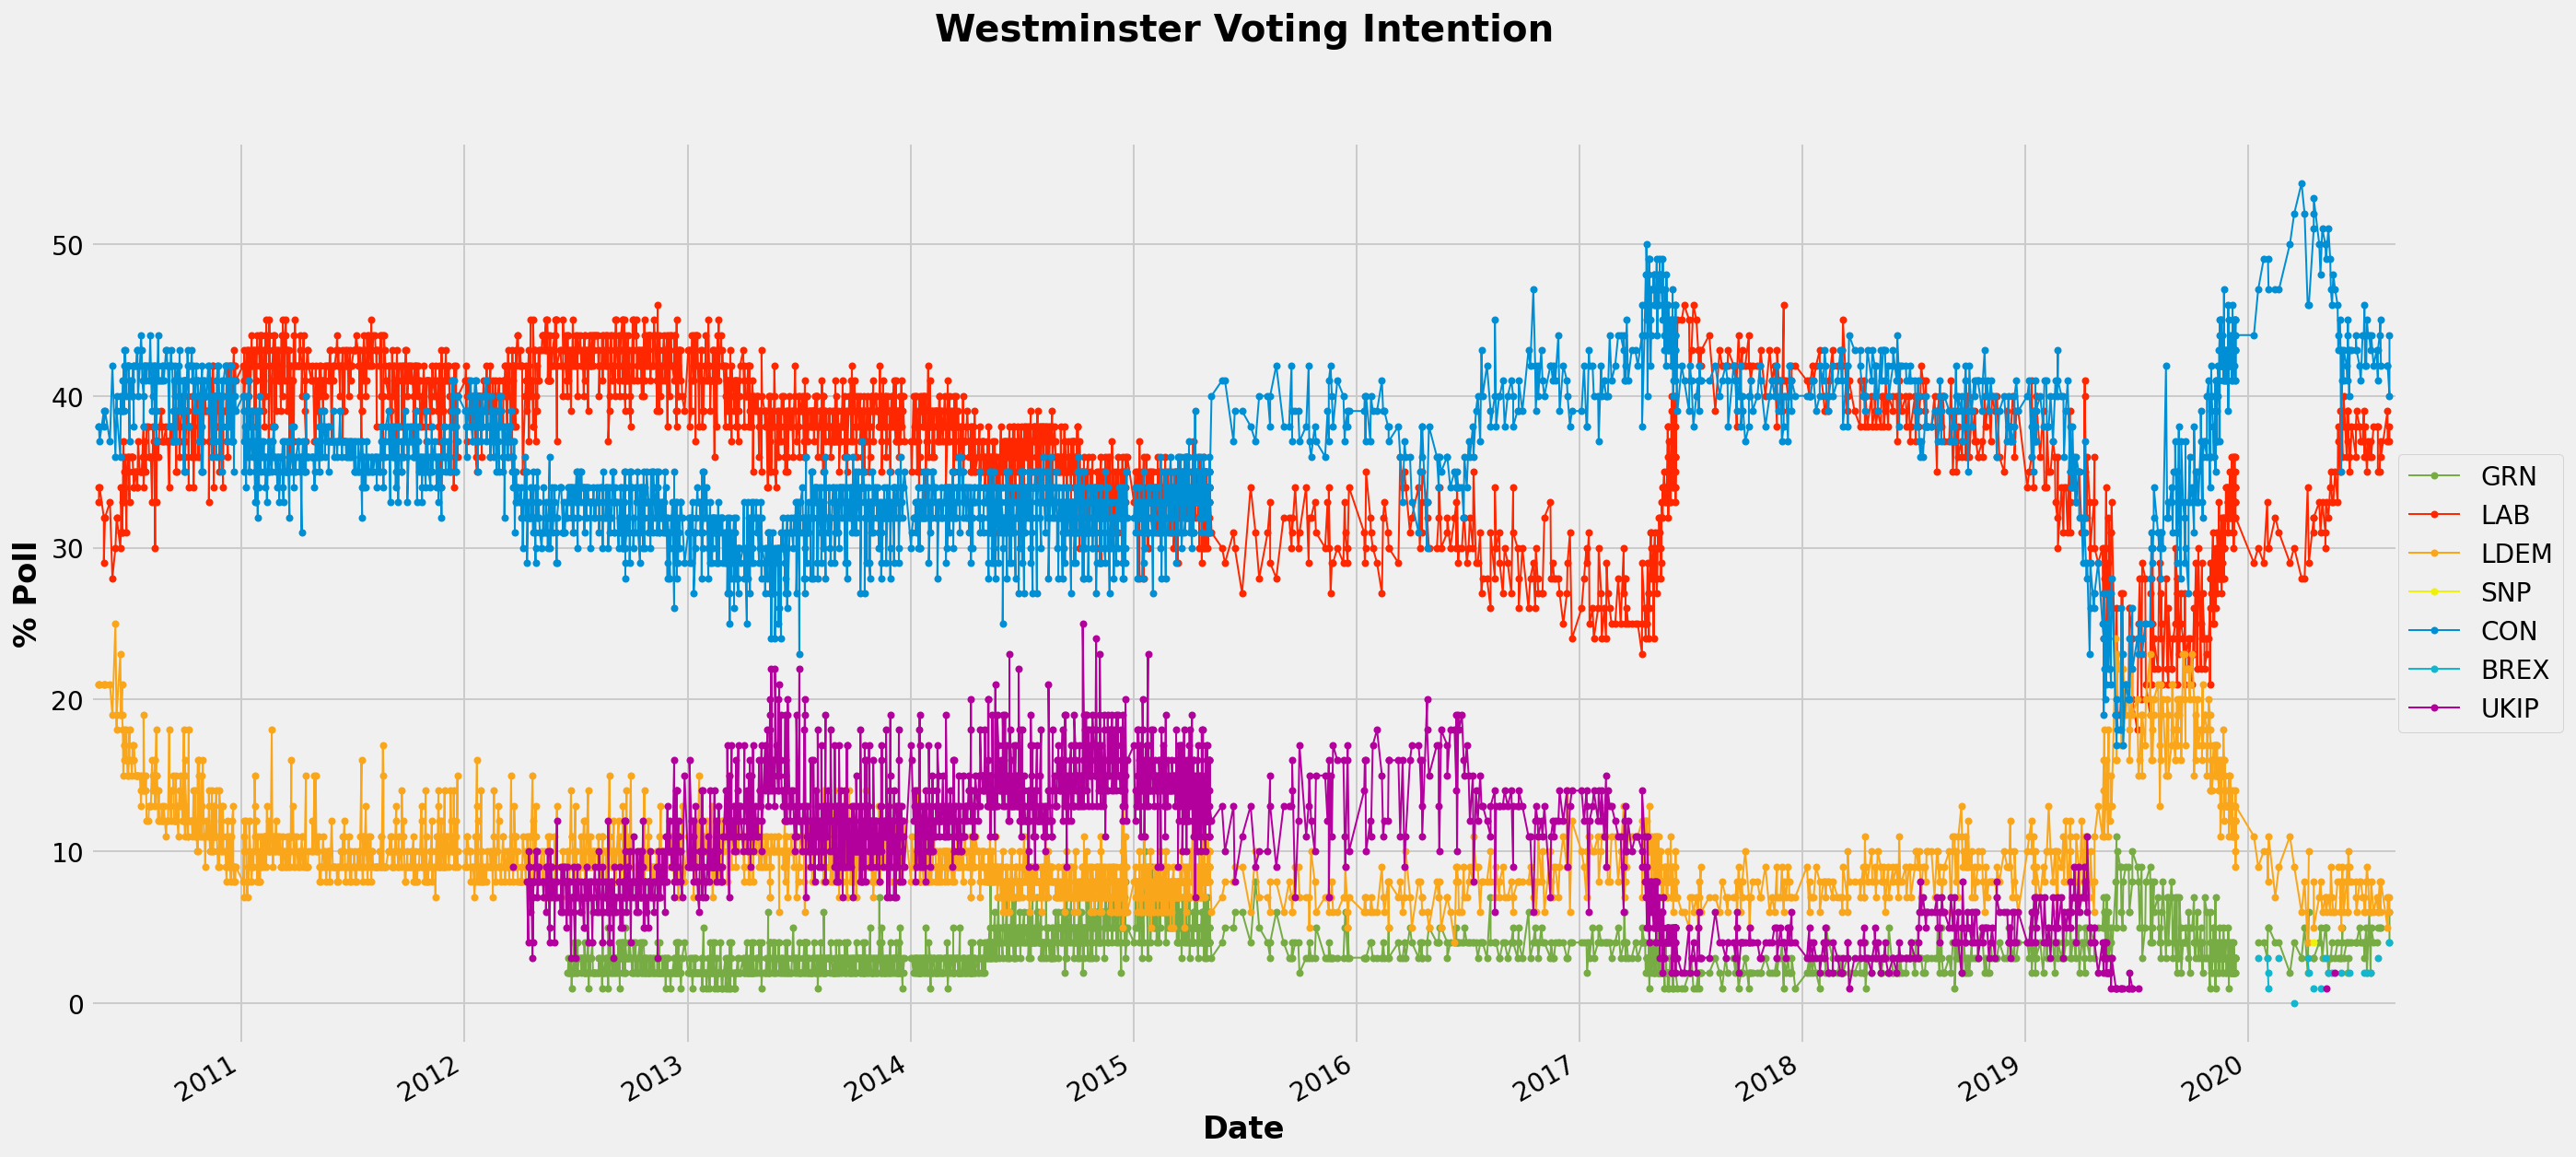

In [14]:
plot_vote_intention(df)

(<Figure size 1440x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'Westminster Voting Intention - Semi-Month Aggregation'}, xlabel='Date', ylabel='% Poll'>)

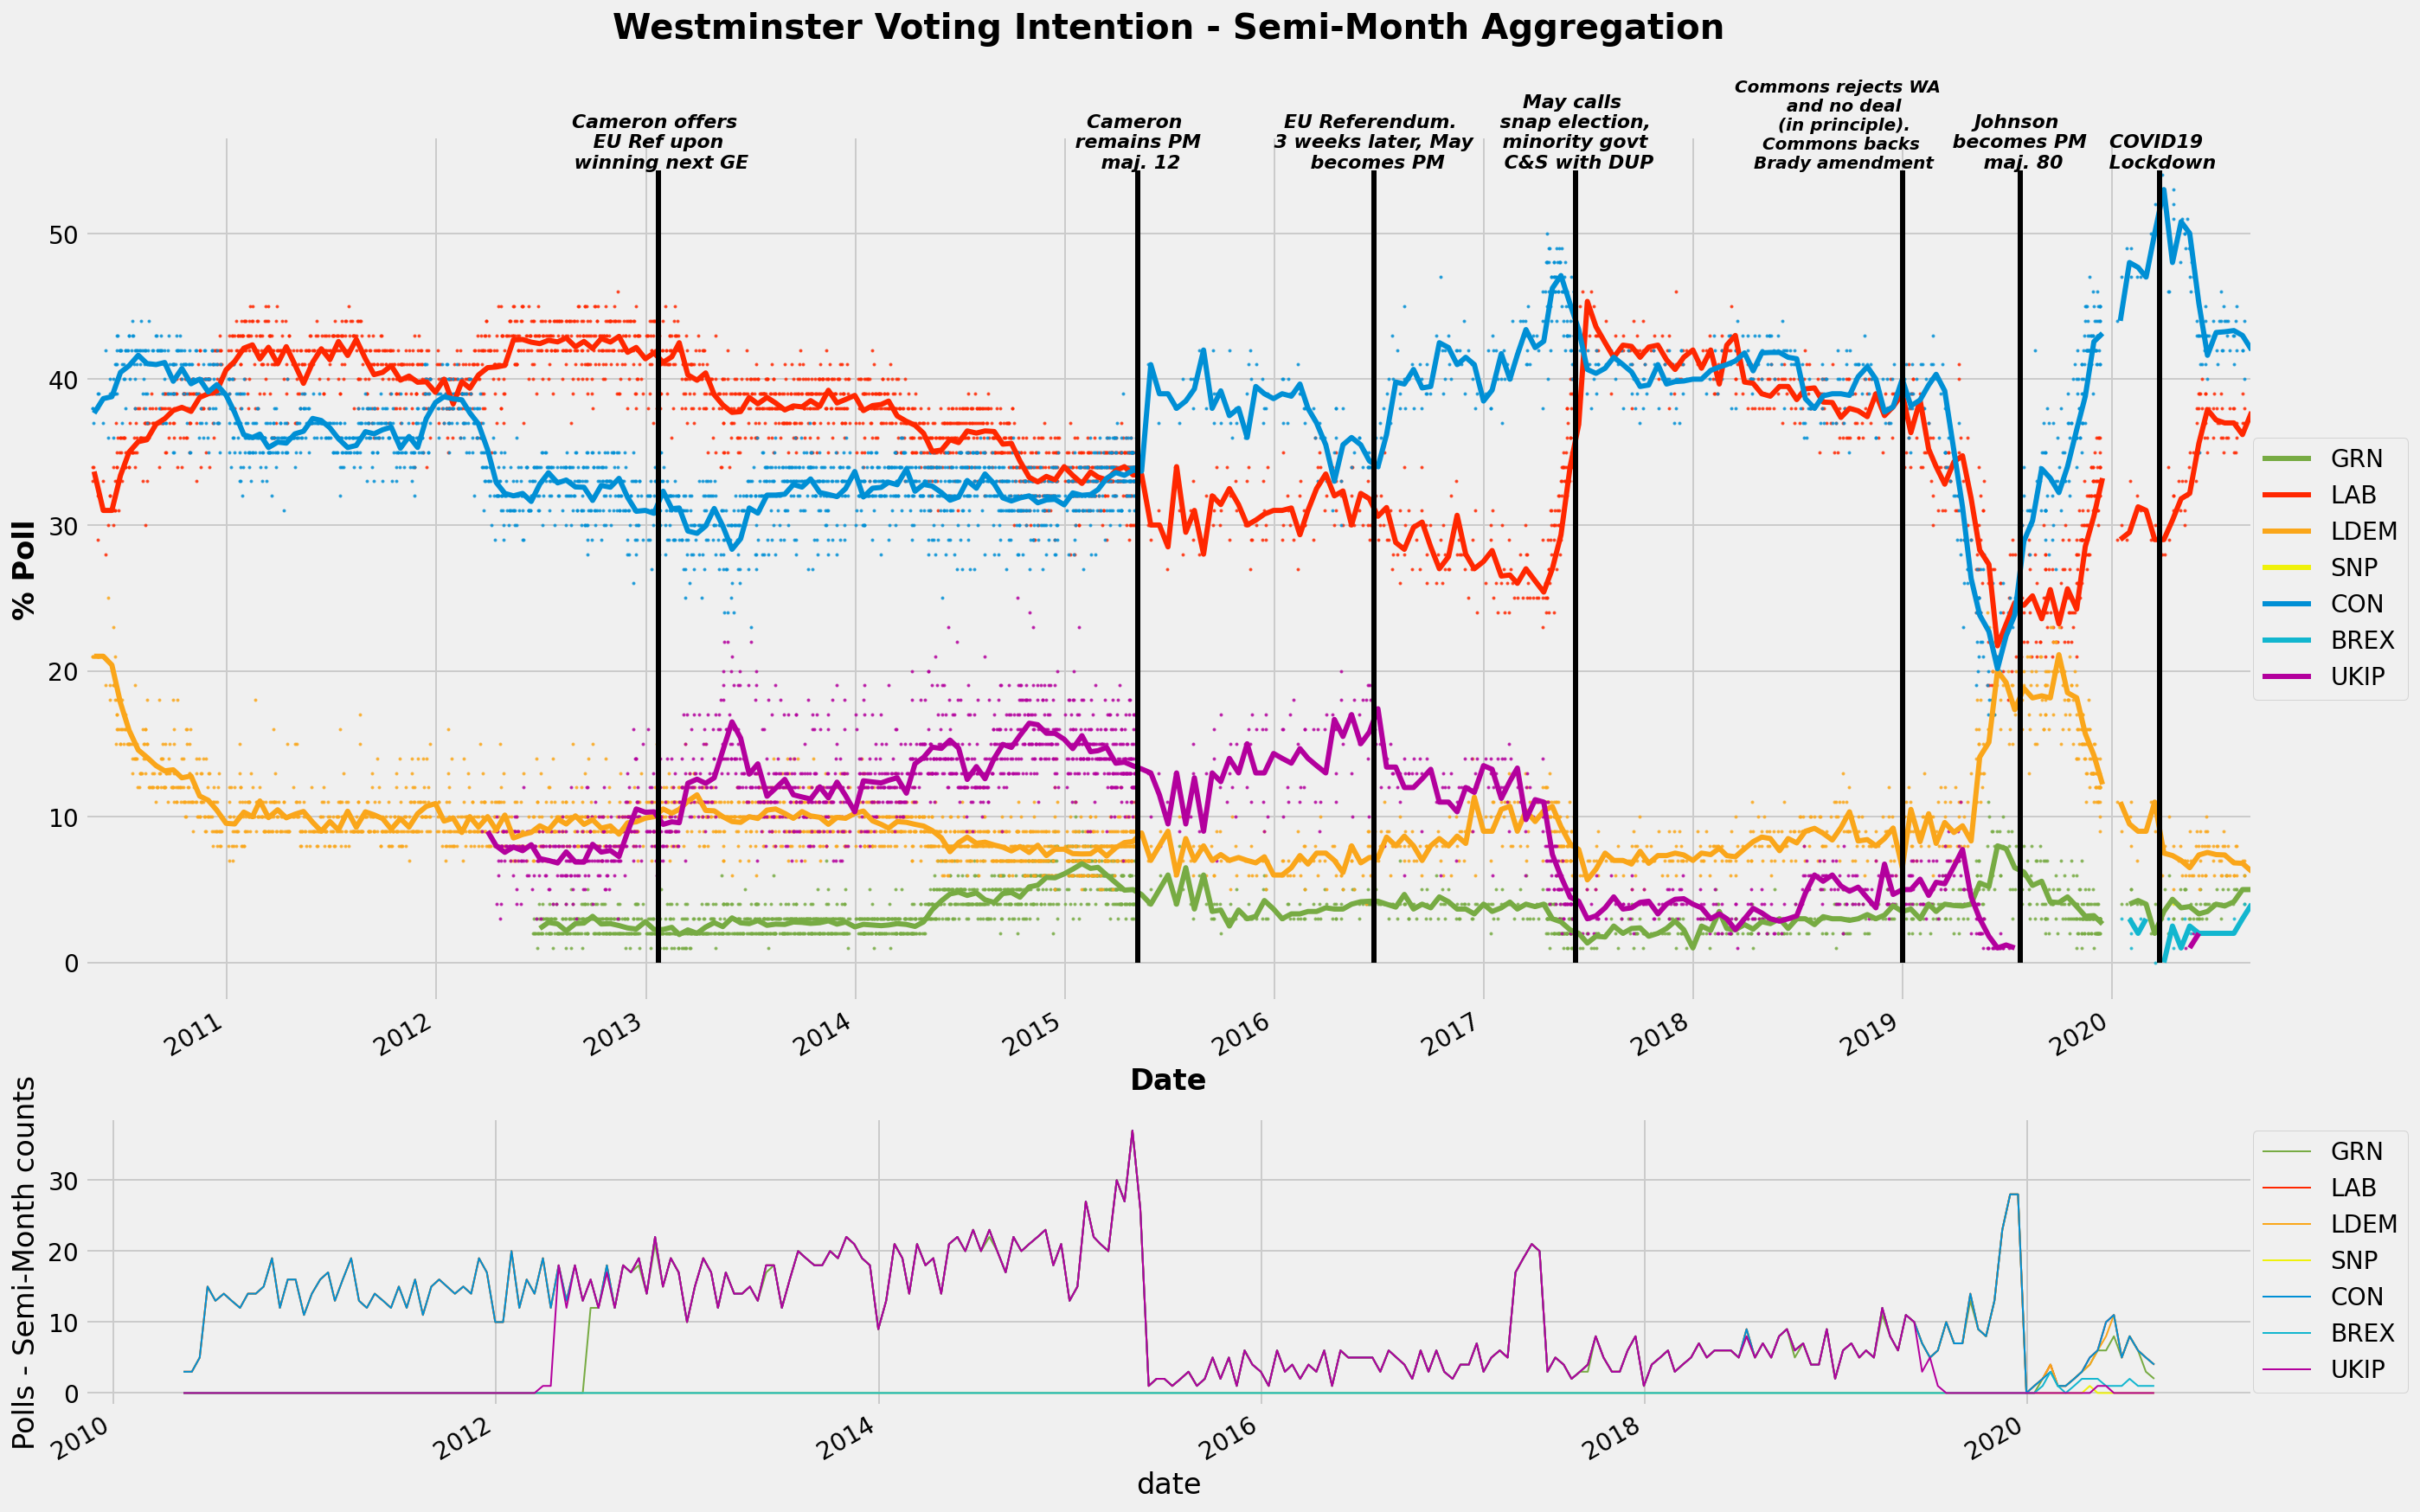

In [15]:
plot_vote_intention(df, agg='SM', add_lifetime_context=True)

(<Figure size 1440x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'Westminster Voting Intention - Monthly Aggregation'}, xlabel='Date', ylabel='% Poll'>)

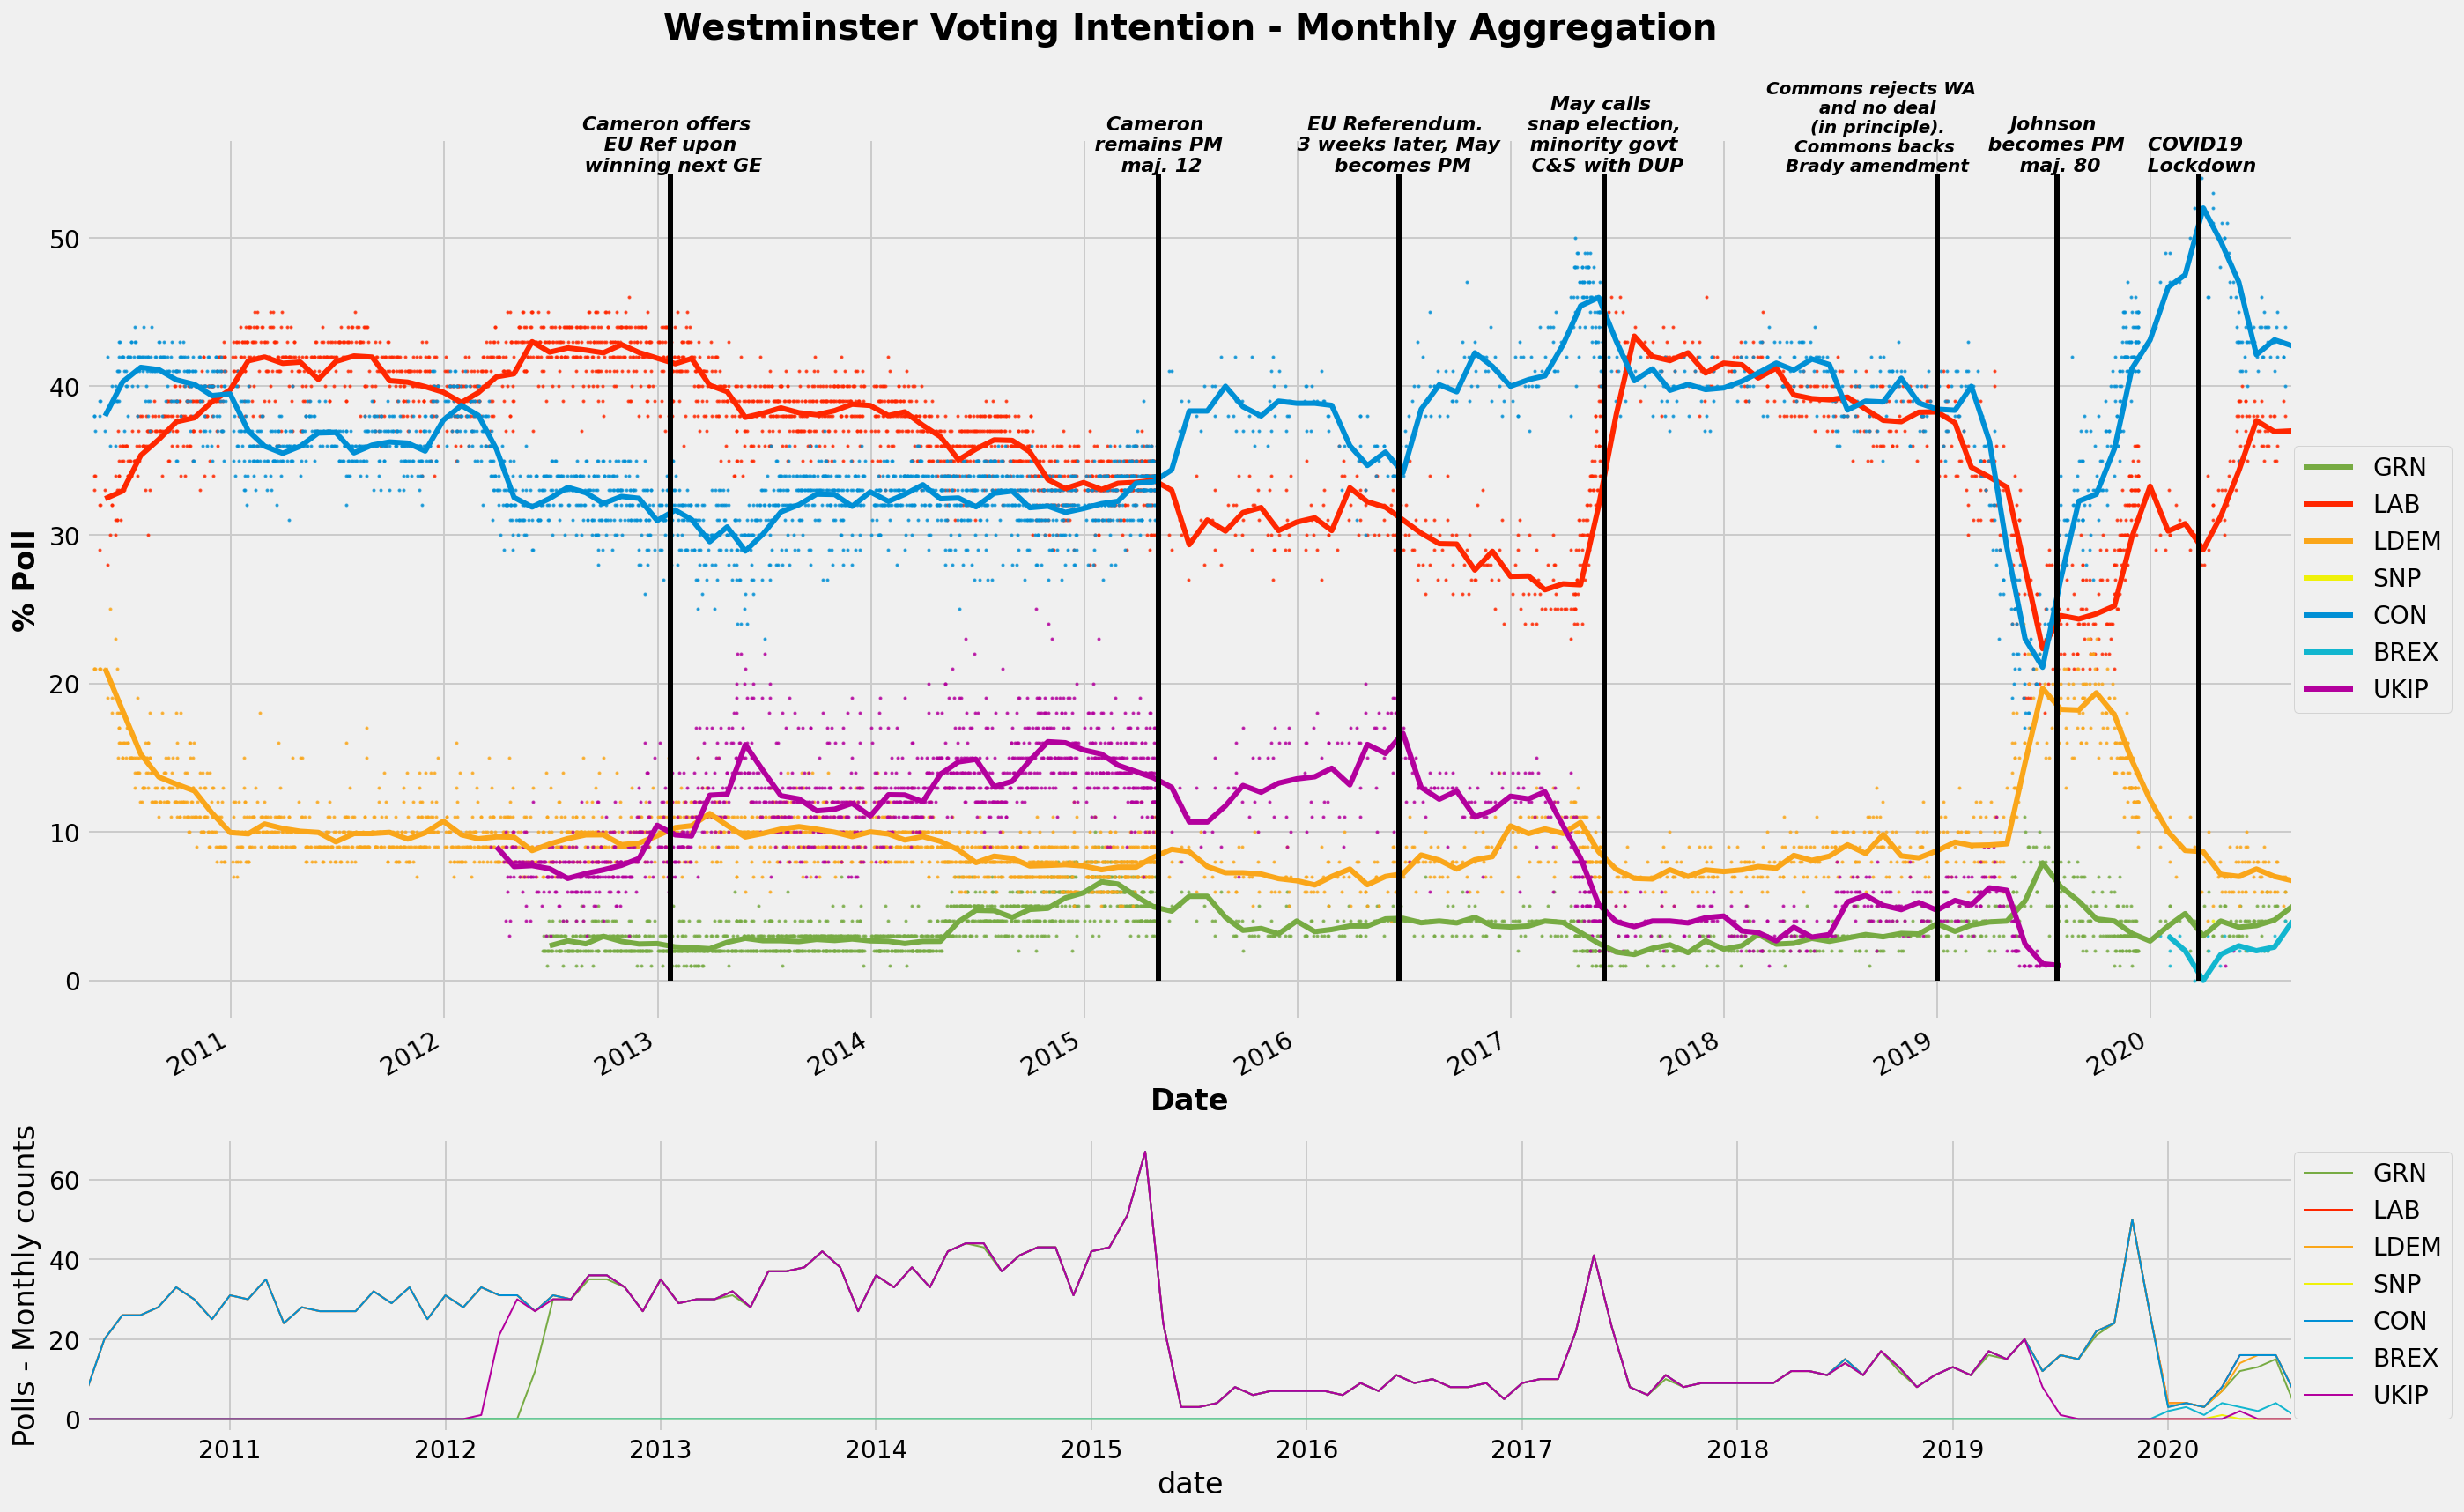

In [16]:
plot_vote_intention(df, agg='M', add_lifetime_context=True)

In [17]:
df[list(parties)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2764 entries, 2010-05-13 00:00:00 to 2020-08-19 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRN     2029 non-null   float64
 1   LAB     2764 non-null   int64  
 2   LDEM    2761 non-null   float64
 3   SNP     1 non-null      float64
 4   CON     2763 non-null   float64
 5   BREX    20 non-null     float64
 6   UKIP    1889 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 172.8 KB


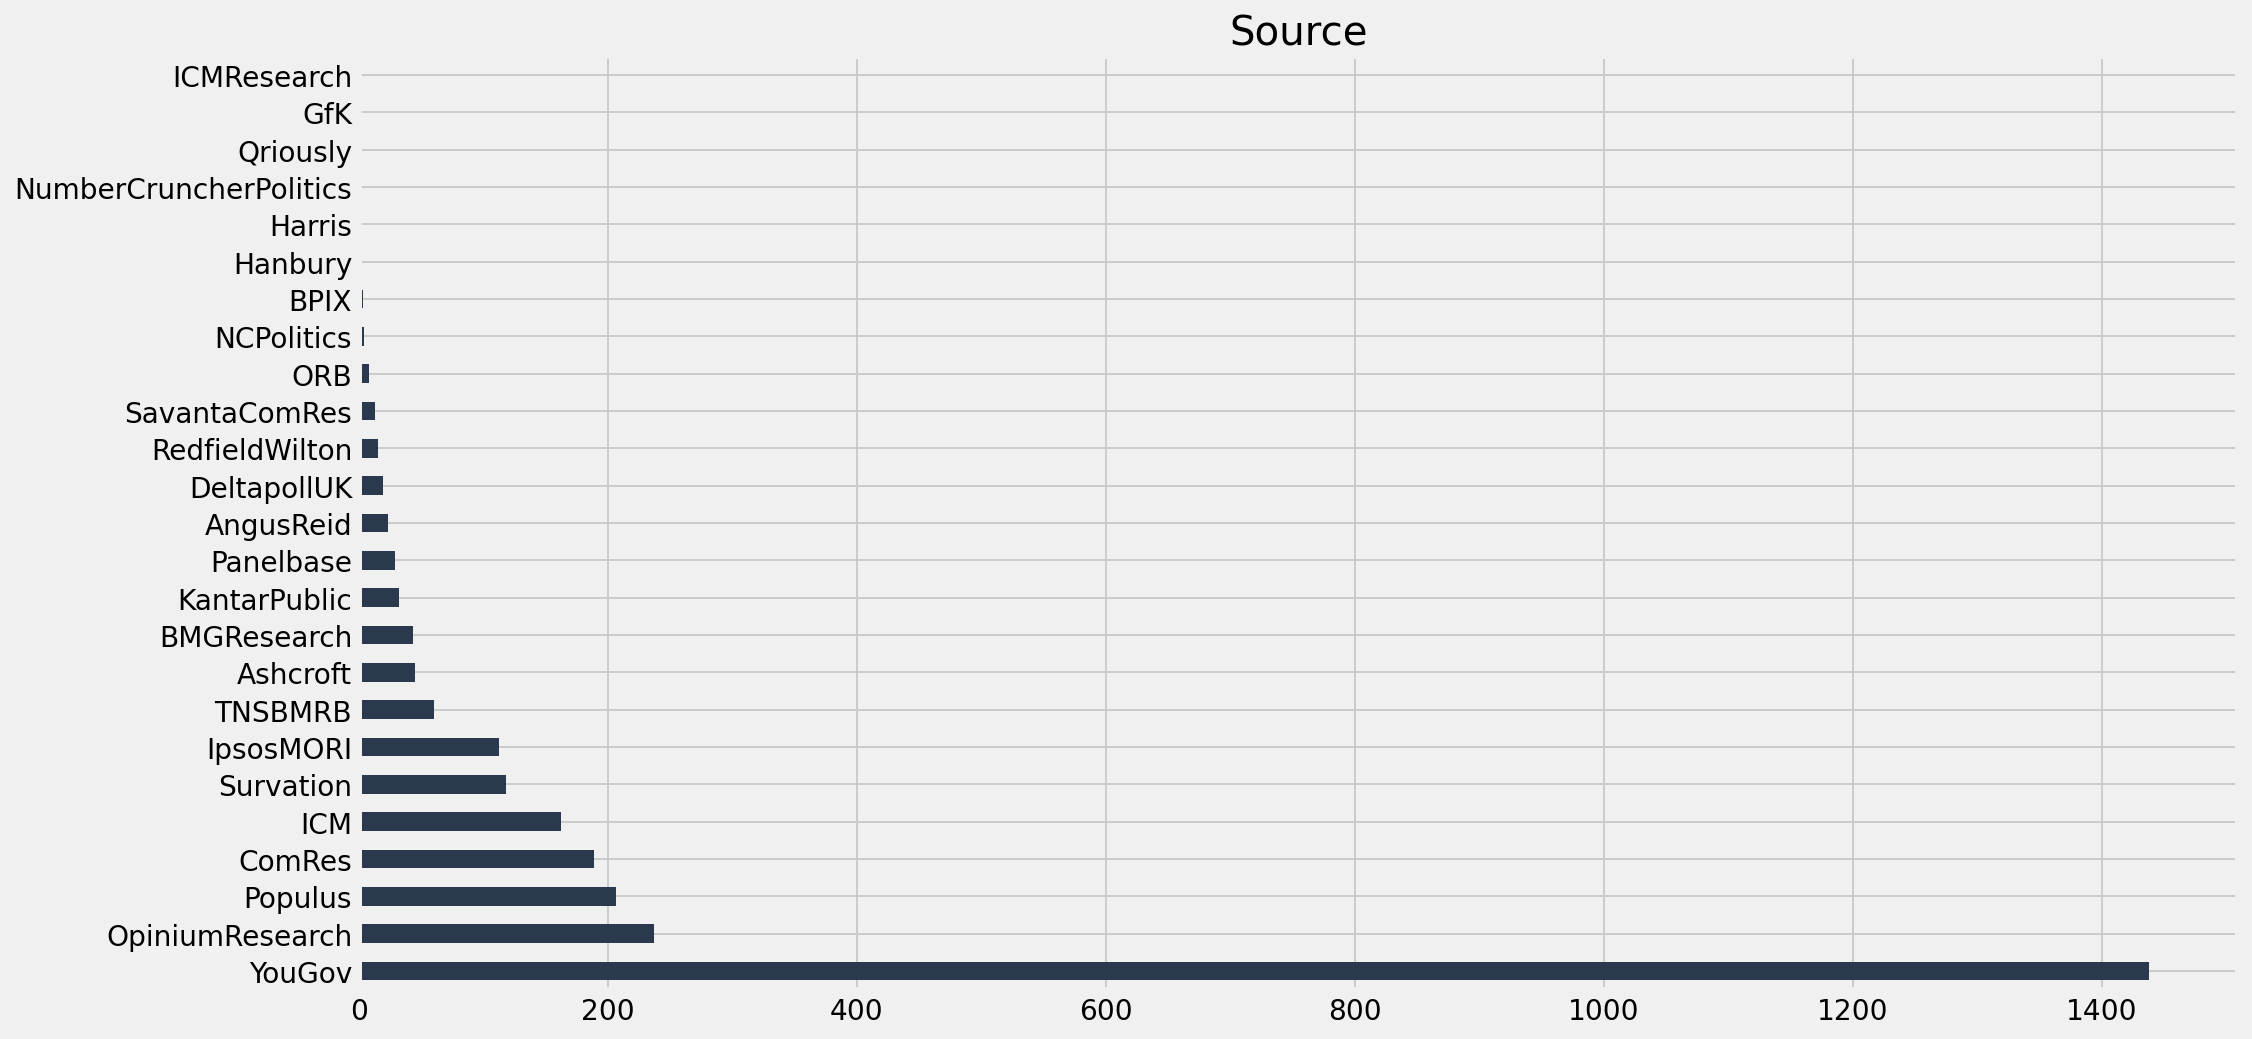

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df["source"].value_counts().plot(kind='barh', ax=ax, color="#2b394f")
ax.set_title("Source");

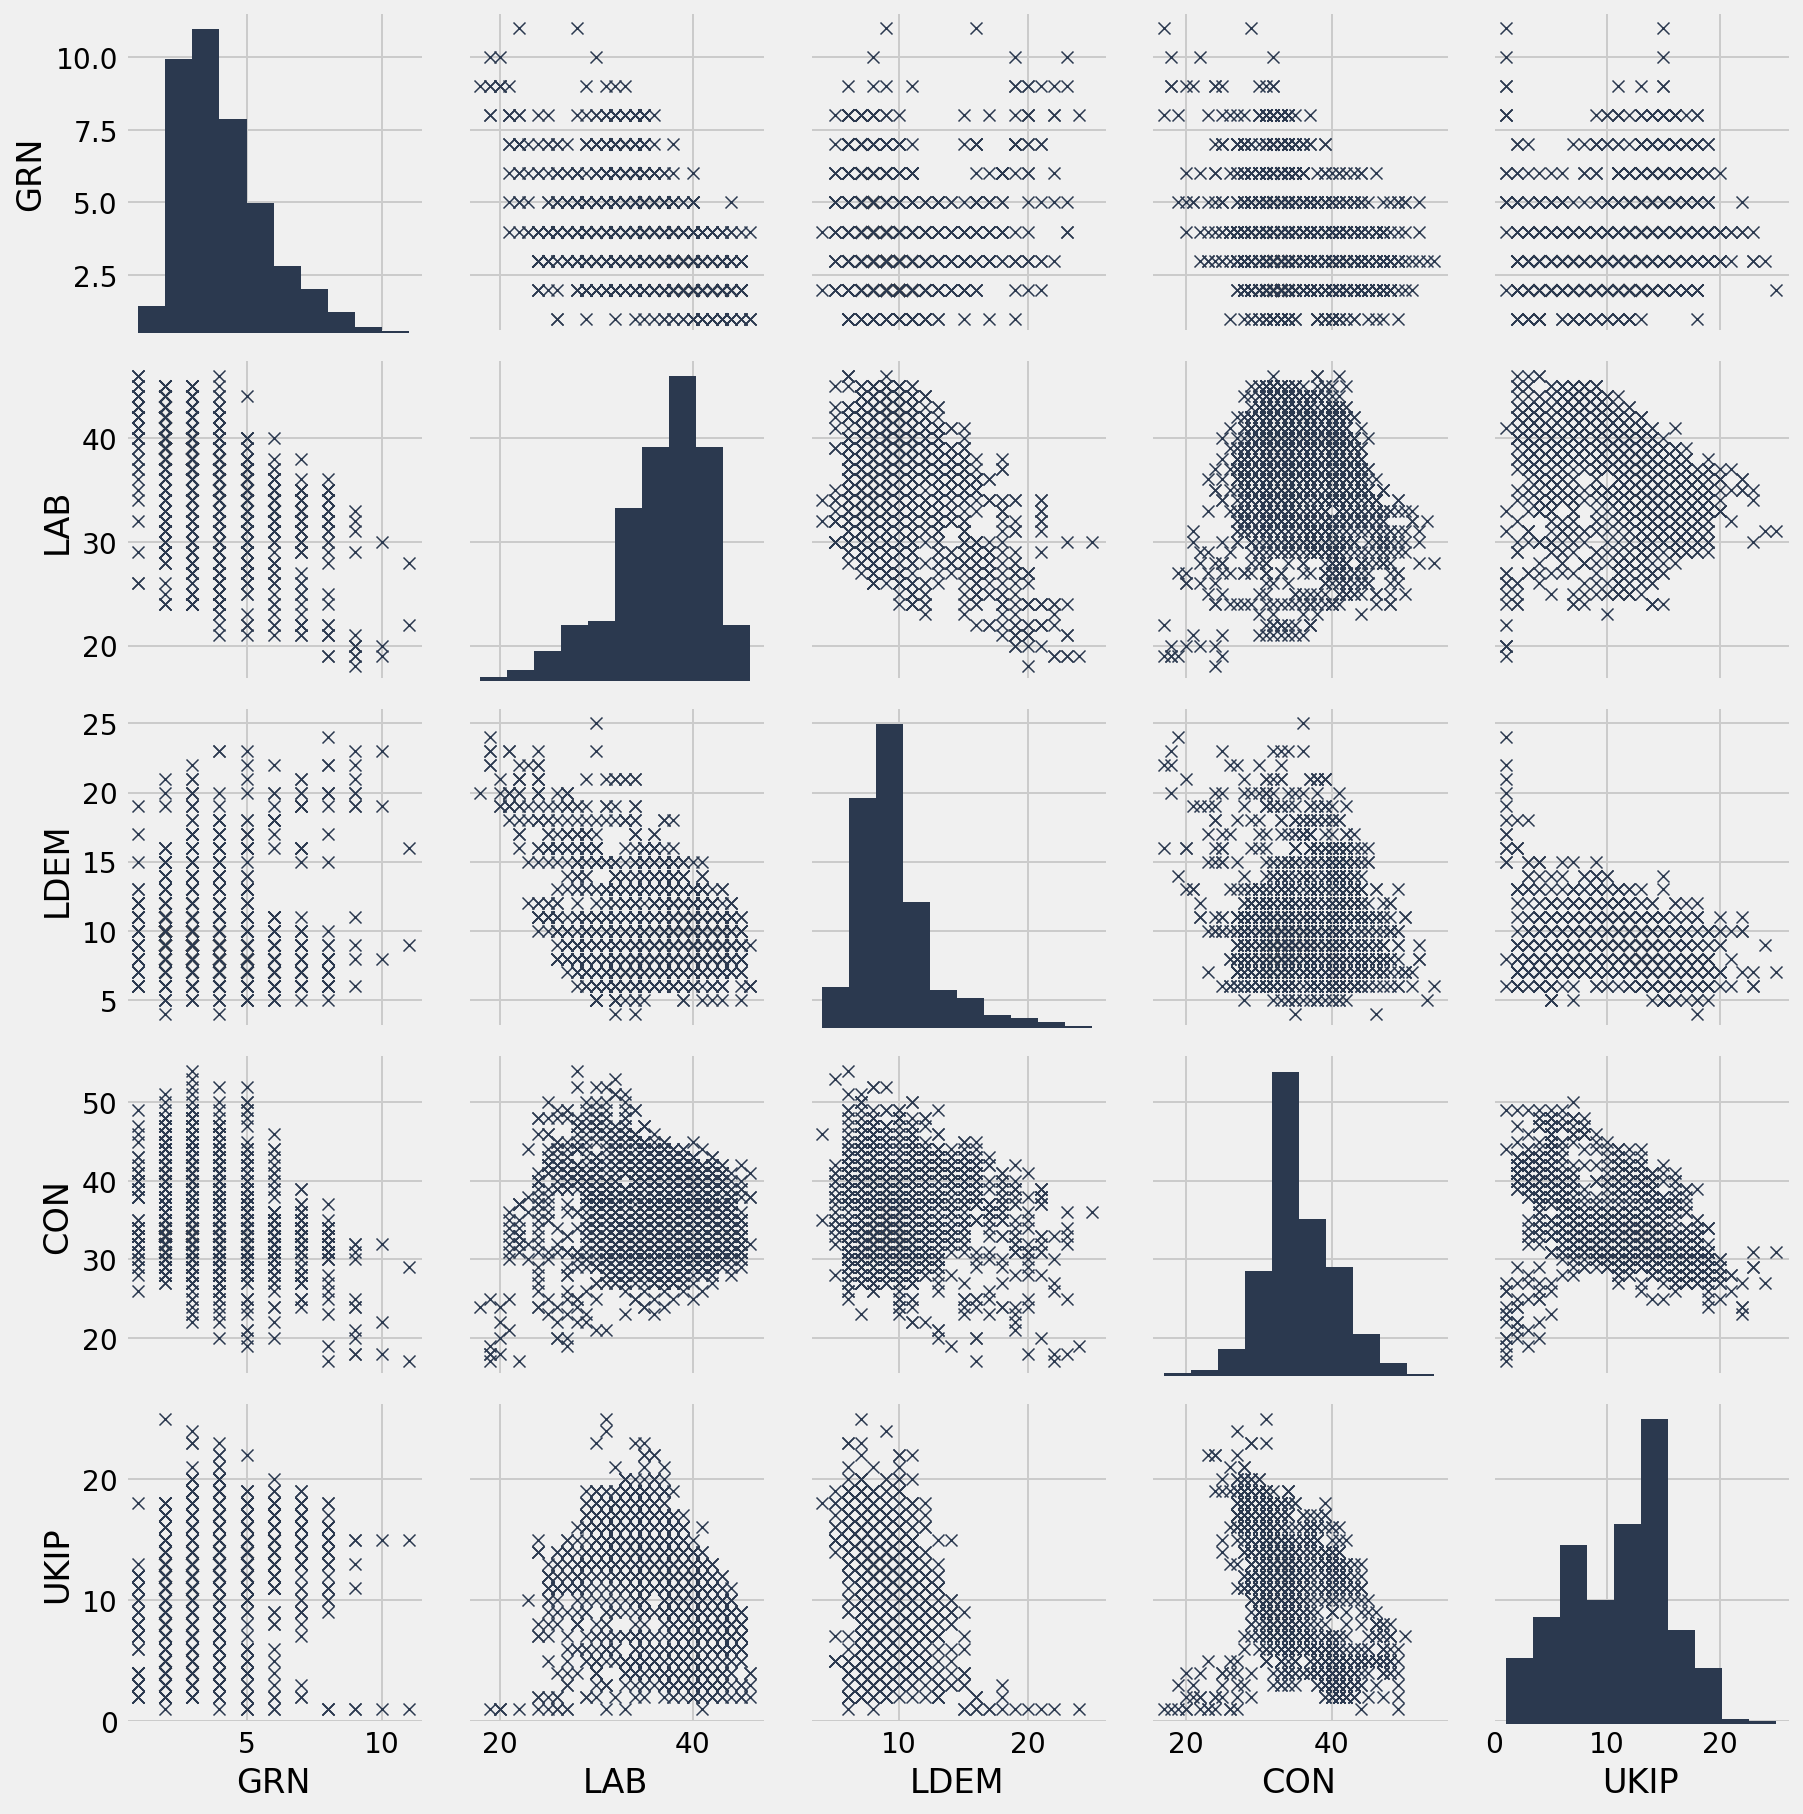

In [19]:
sns.pairplot(df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']], markers="x",
             diag_kws={"color": "#2b394f"},
             plot_kws={"color": "#2b394f"});

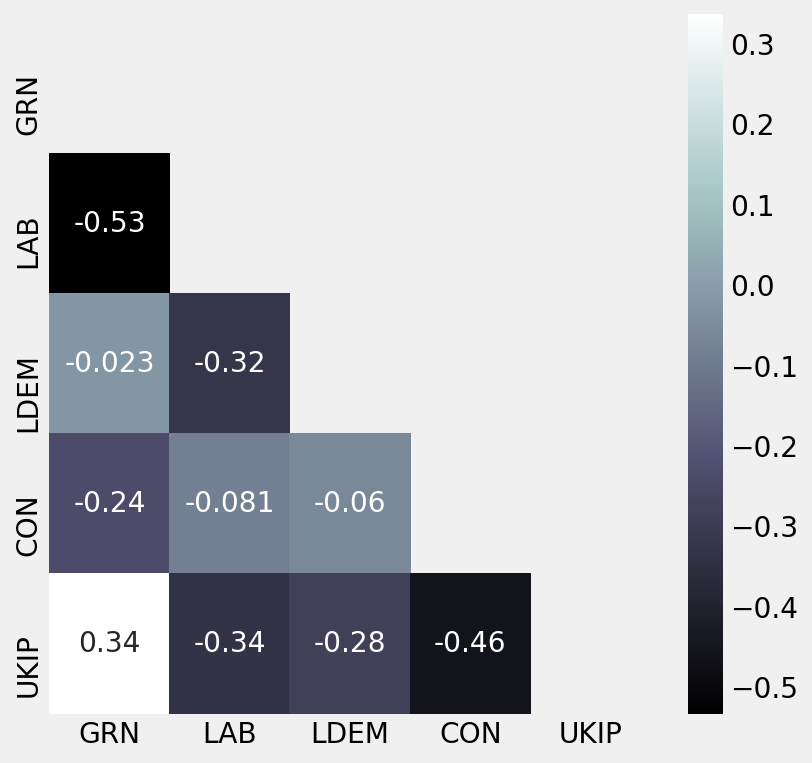

In [20]:
corr = df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='bone', mask=mask);

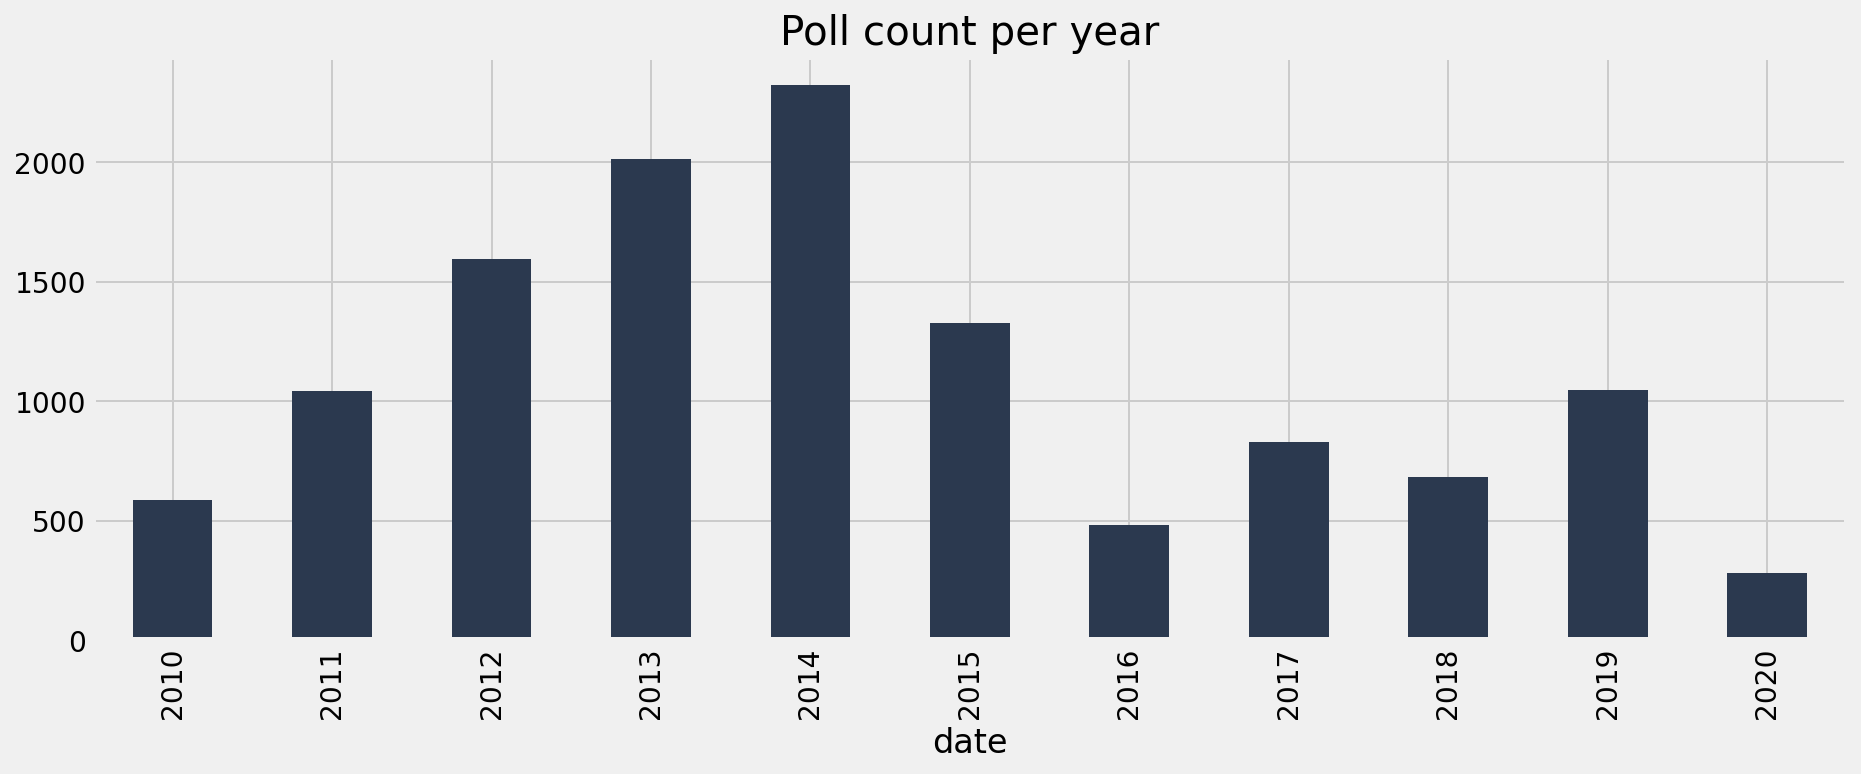

In [21]:
df.groupby(df.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count().sum(axis='columns').plot.bar(figsize=(14, 5), color="#2b394f")
plt.title("Poll count per year");

In [22]:
df_w = df.resample("W").mean()

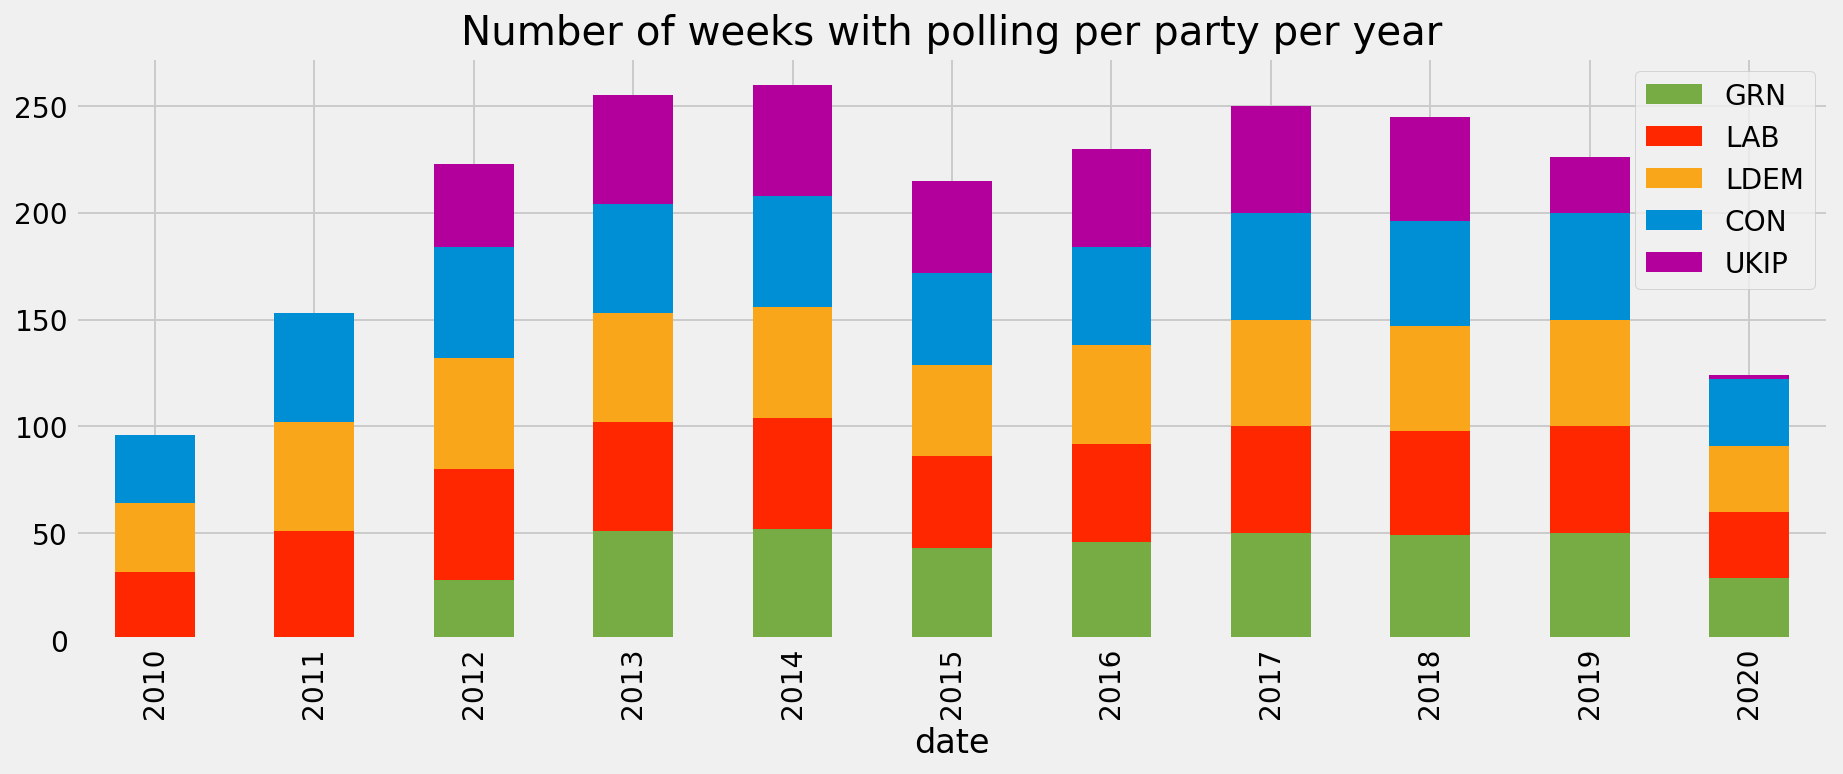

In [23]:
(df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()
 .plot.bar(stacked=True,
           figsize=(14, 5),
           color=["#77AB43", "#FF2700", "#FAA61A", "#008FD5", "#B3009D"]));
plt.title("Number of weeks with polling per party per year");

In [24]:
df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()

GRN  LAB  LDEM  CON  UKIP
date                           
2010    0   32    32   32     0
2011    0   51    51   51     0
2012   28   52    52   52    39
2013   51   51    51   51    51
2014   52   52    52   52    52
2015   43   43    43   43    43
2016   46   46    46   46    46
2017   50   50    50   50    50
2018   49   49    49   49    49
2019   50   50    50   50    26
2020   29   31    31   31     2

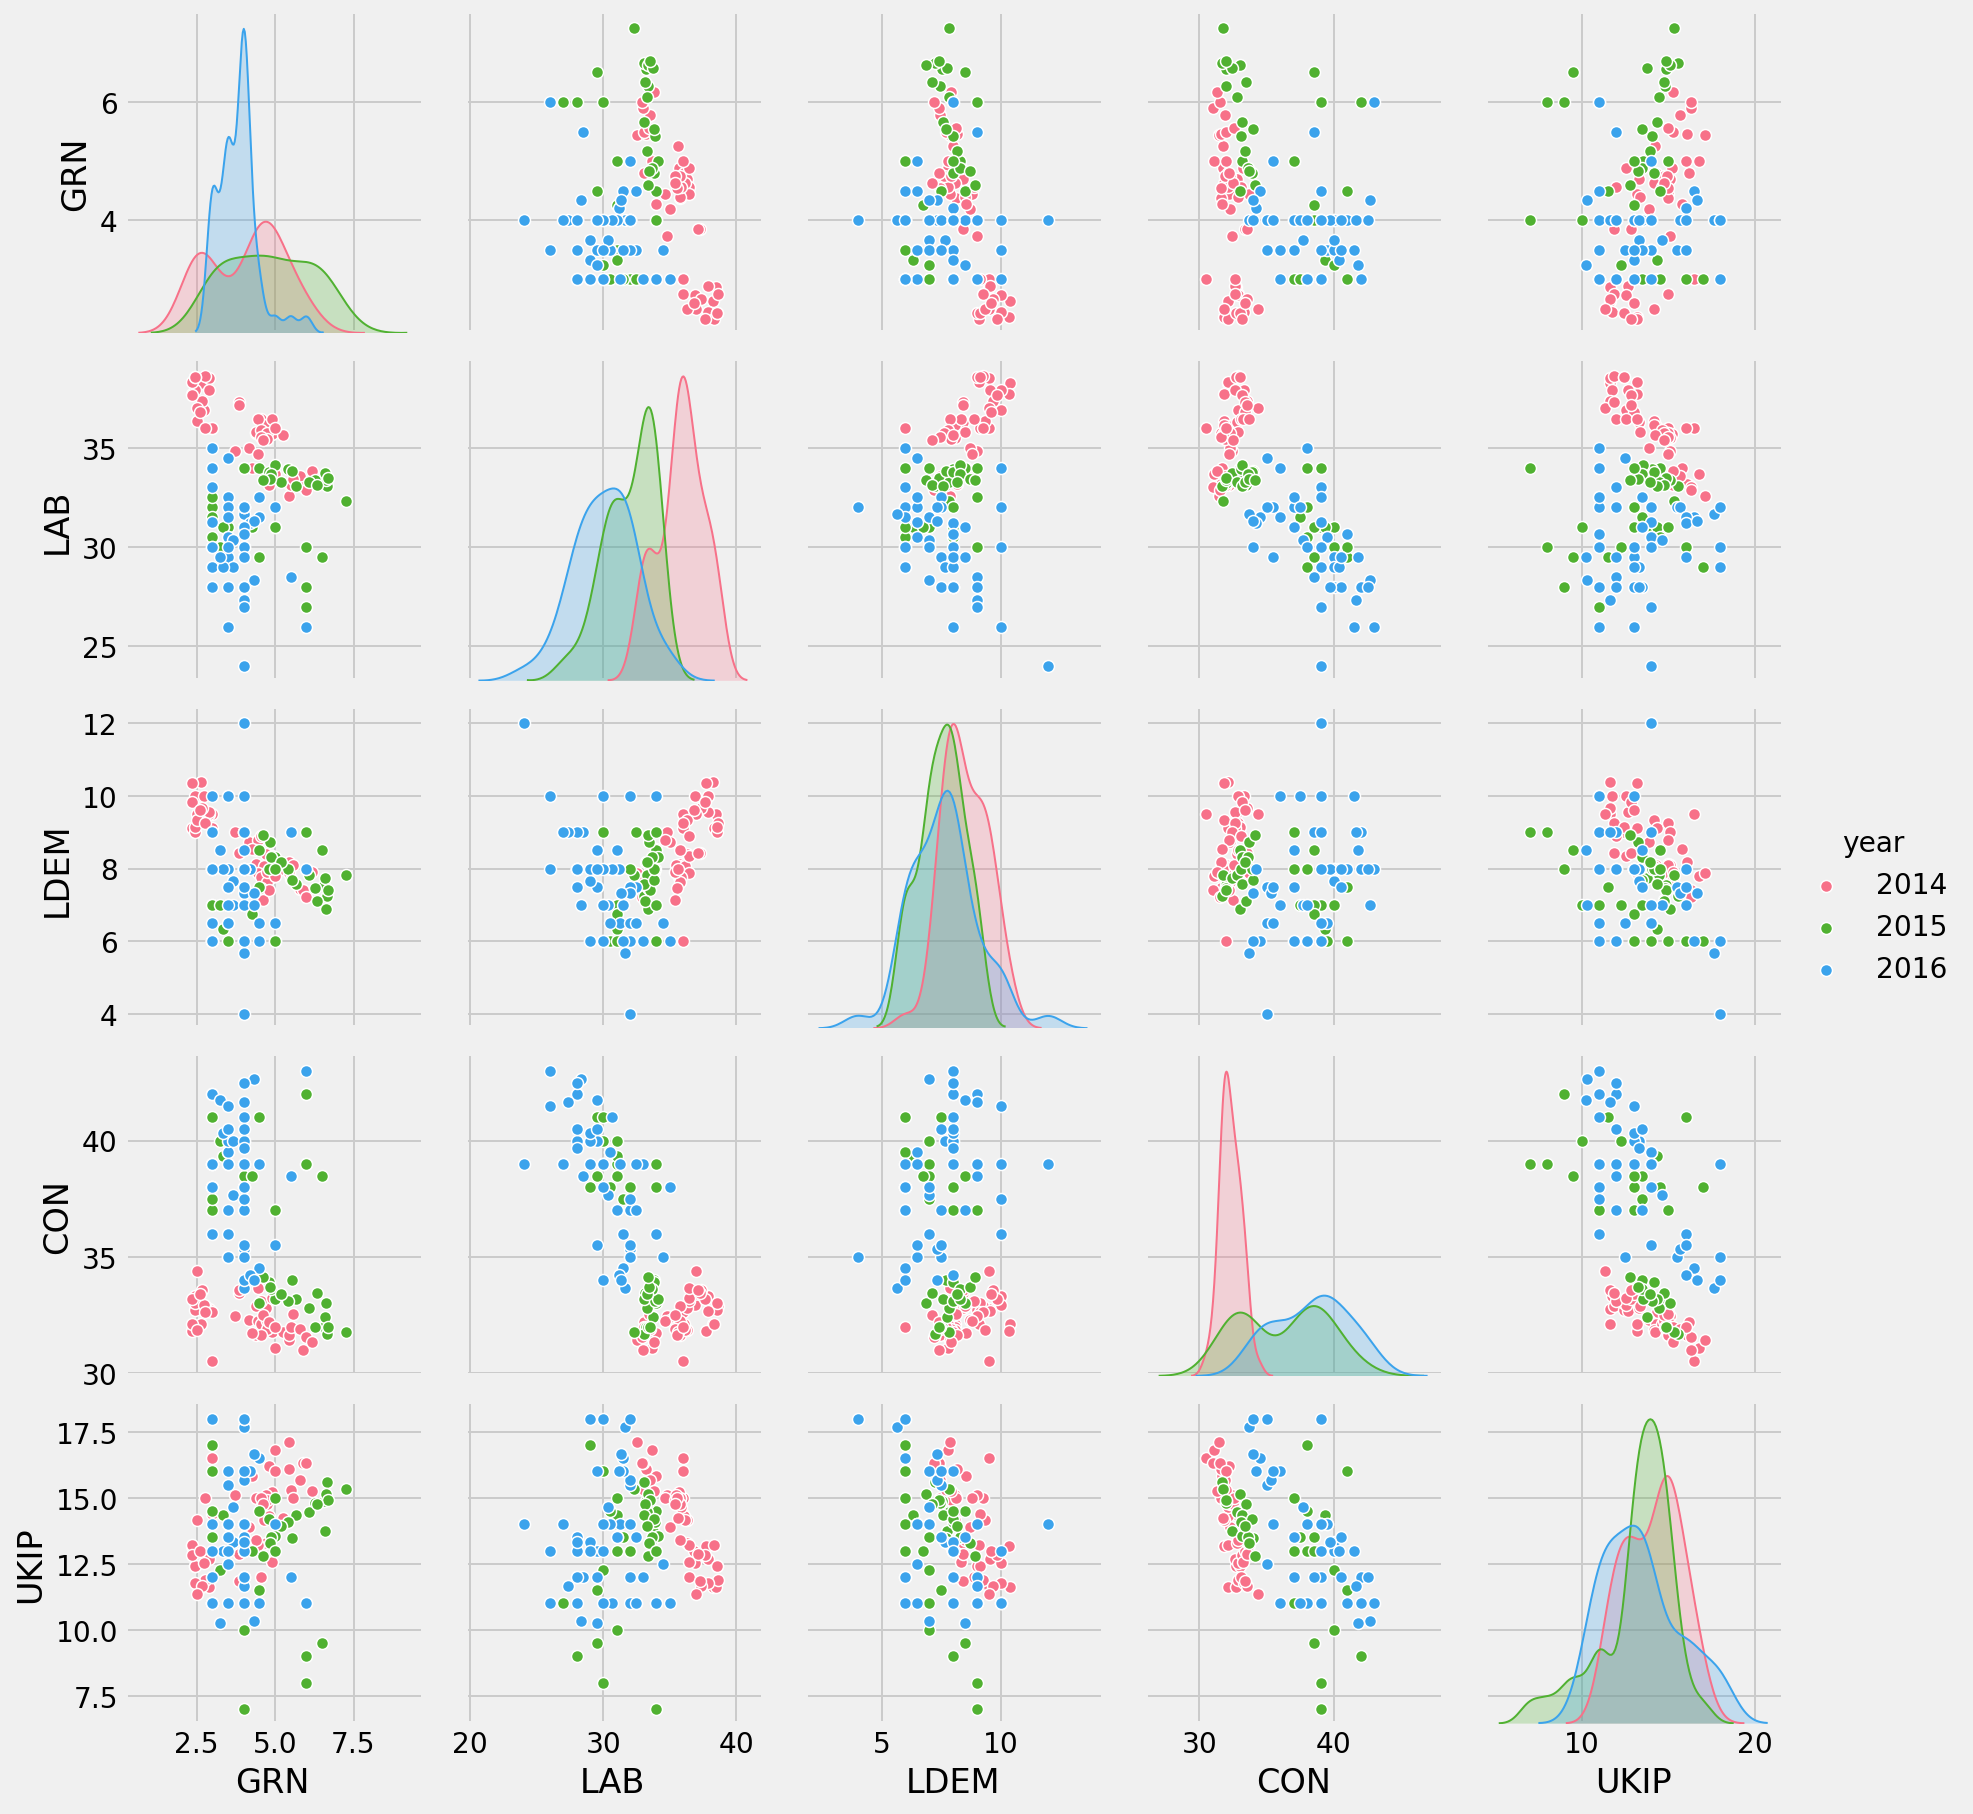

In [25]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2014 <= year <= 2016'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

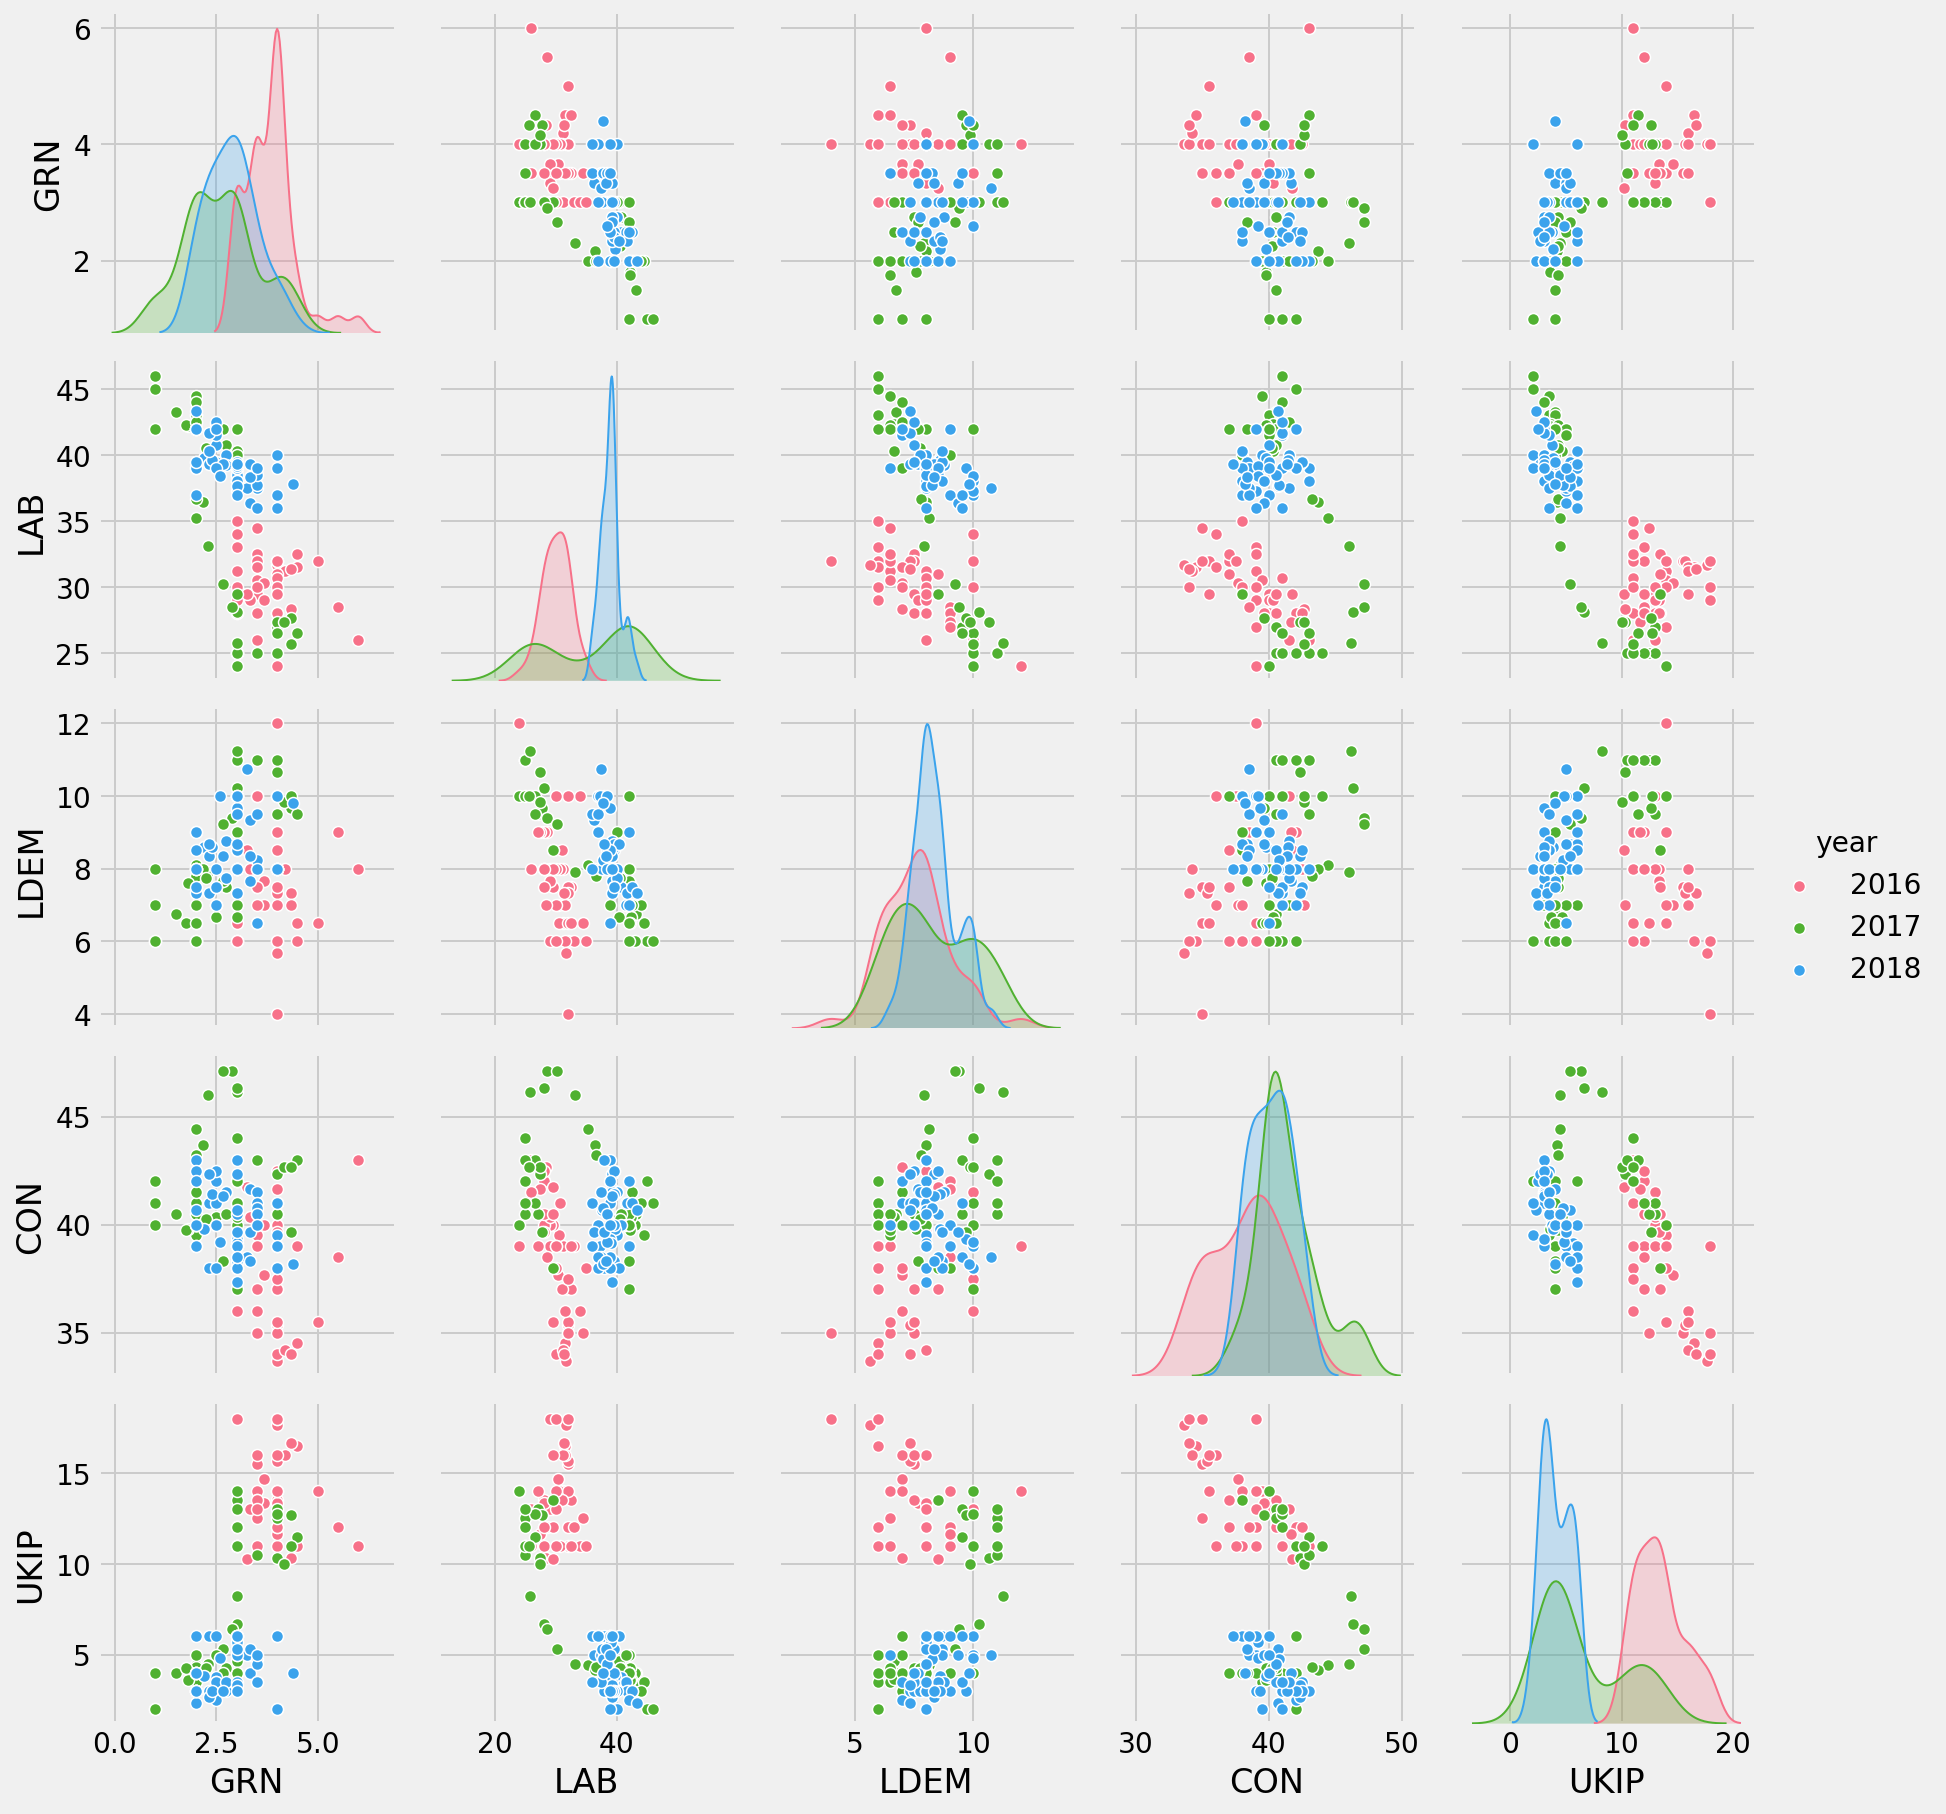

In [26]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2016 <= year <= 2018'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

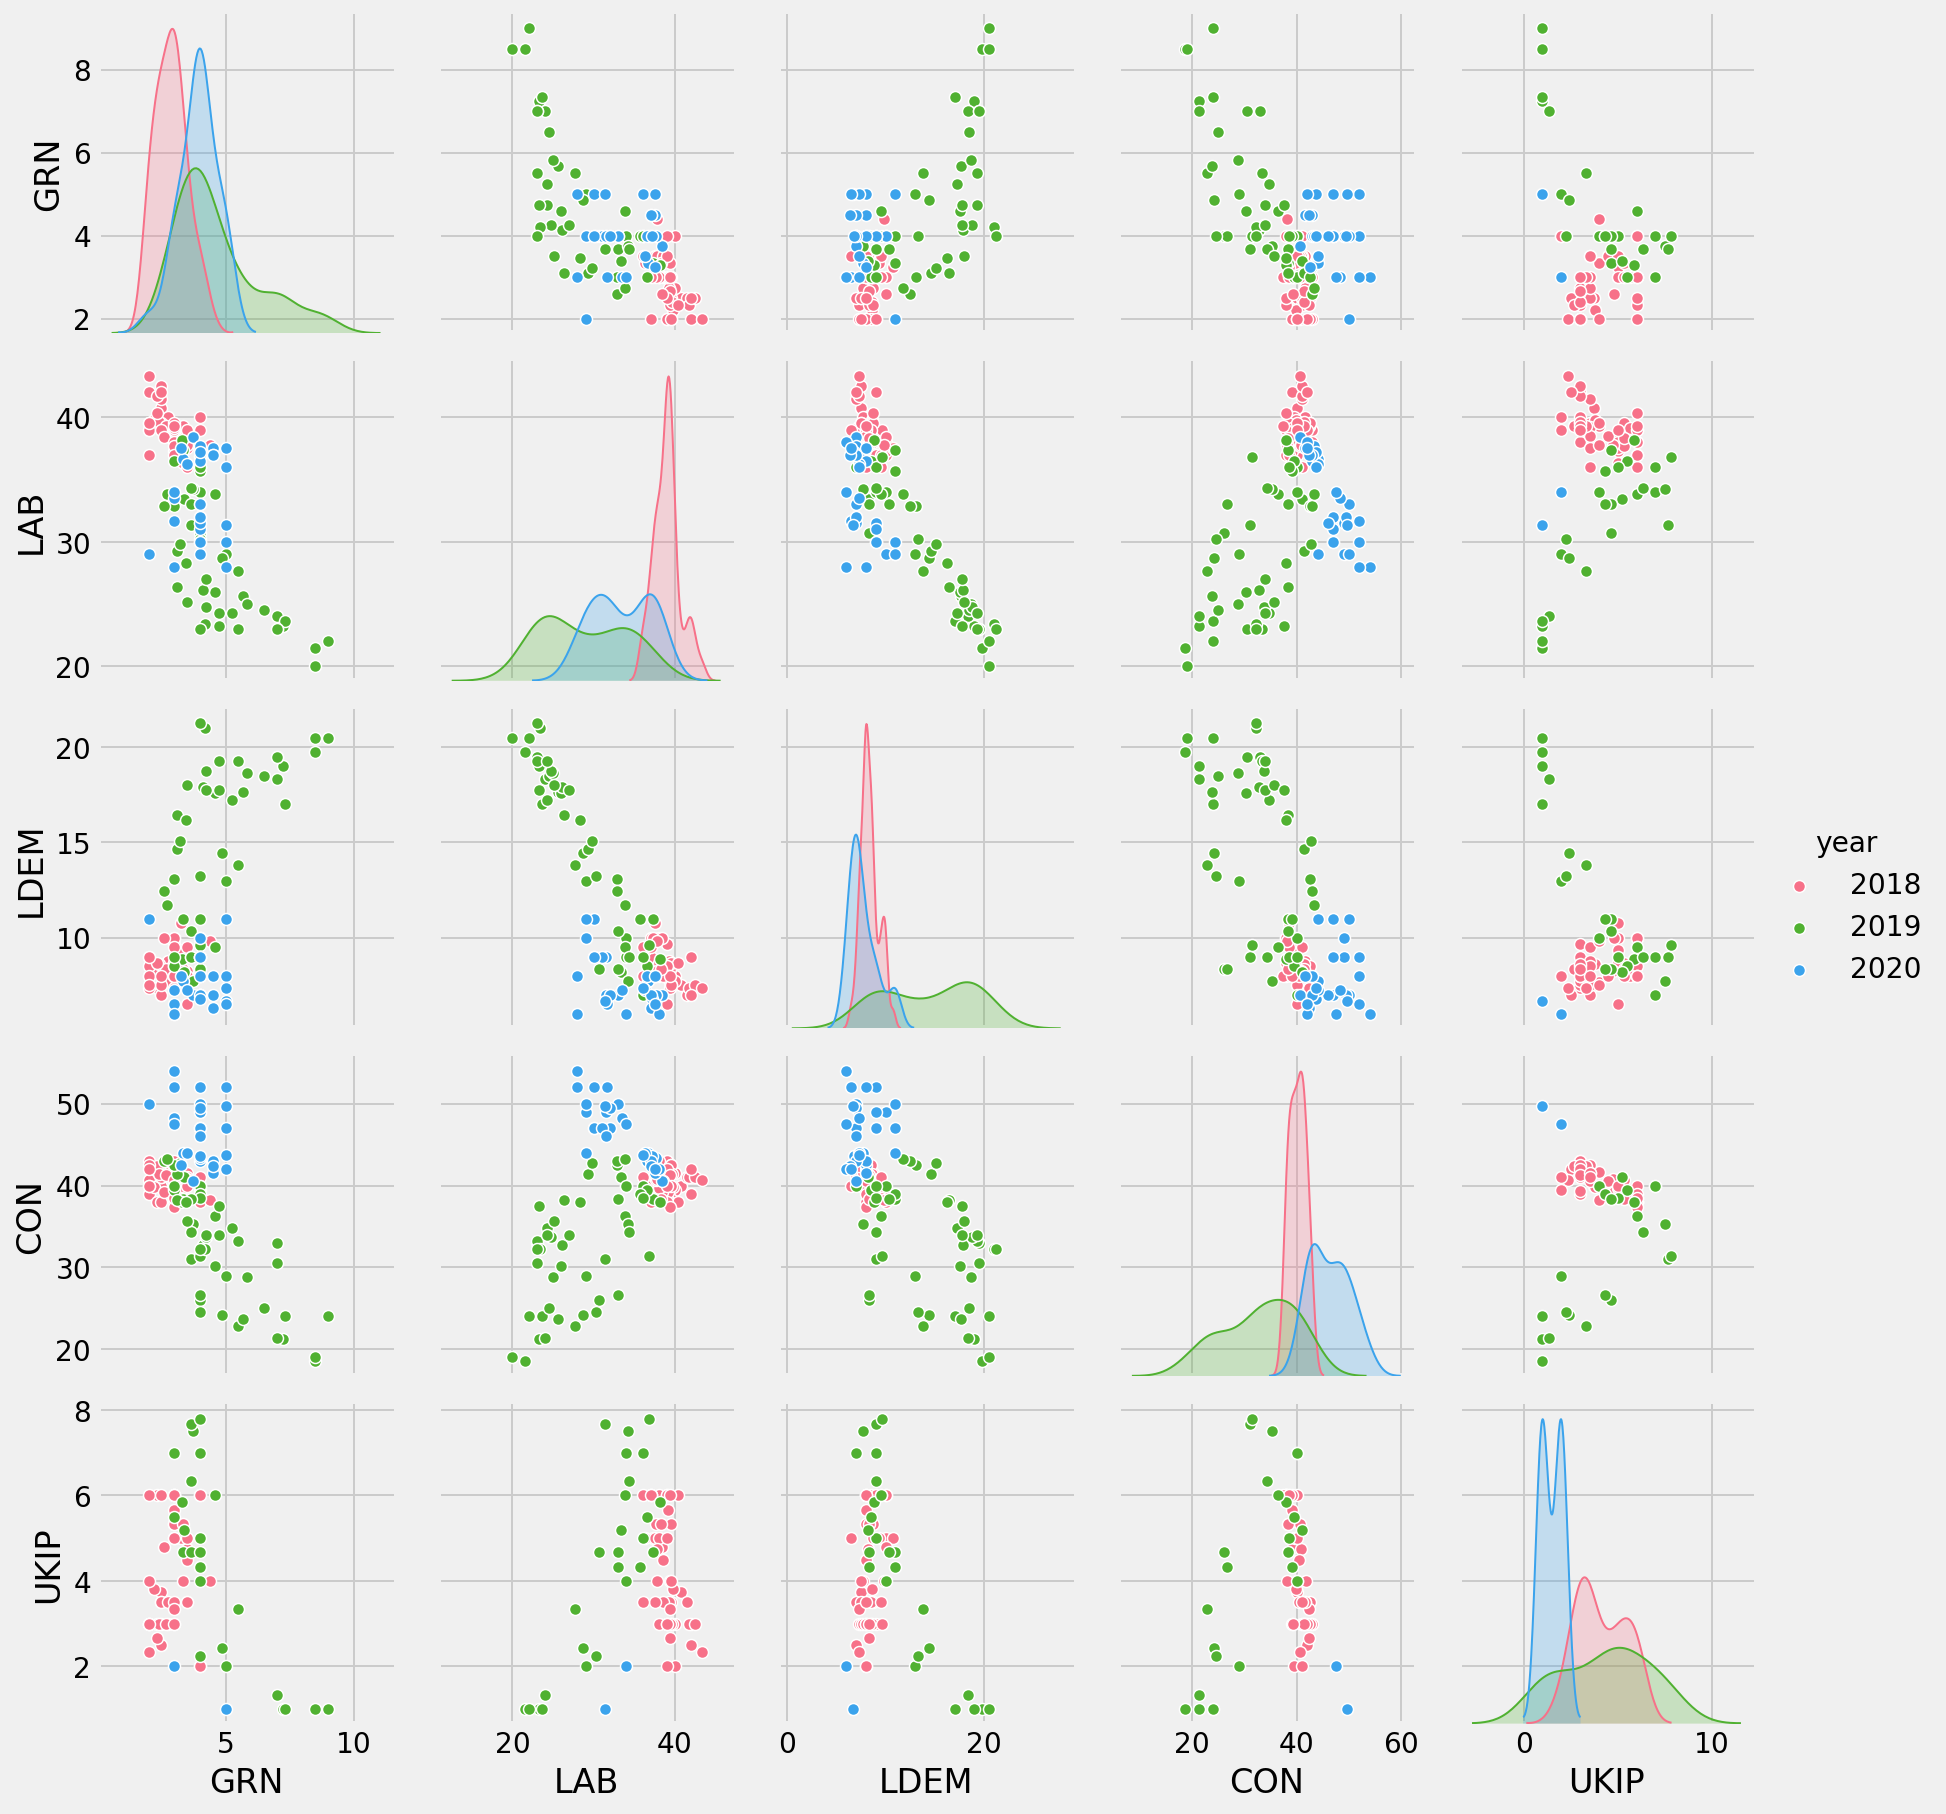

In [27]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2018 <= year <= 2020'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

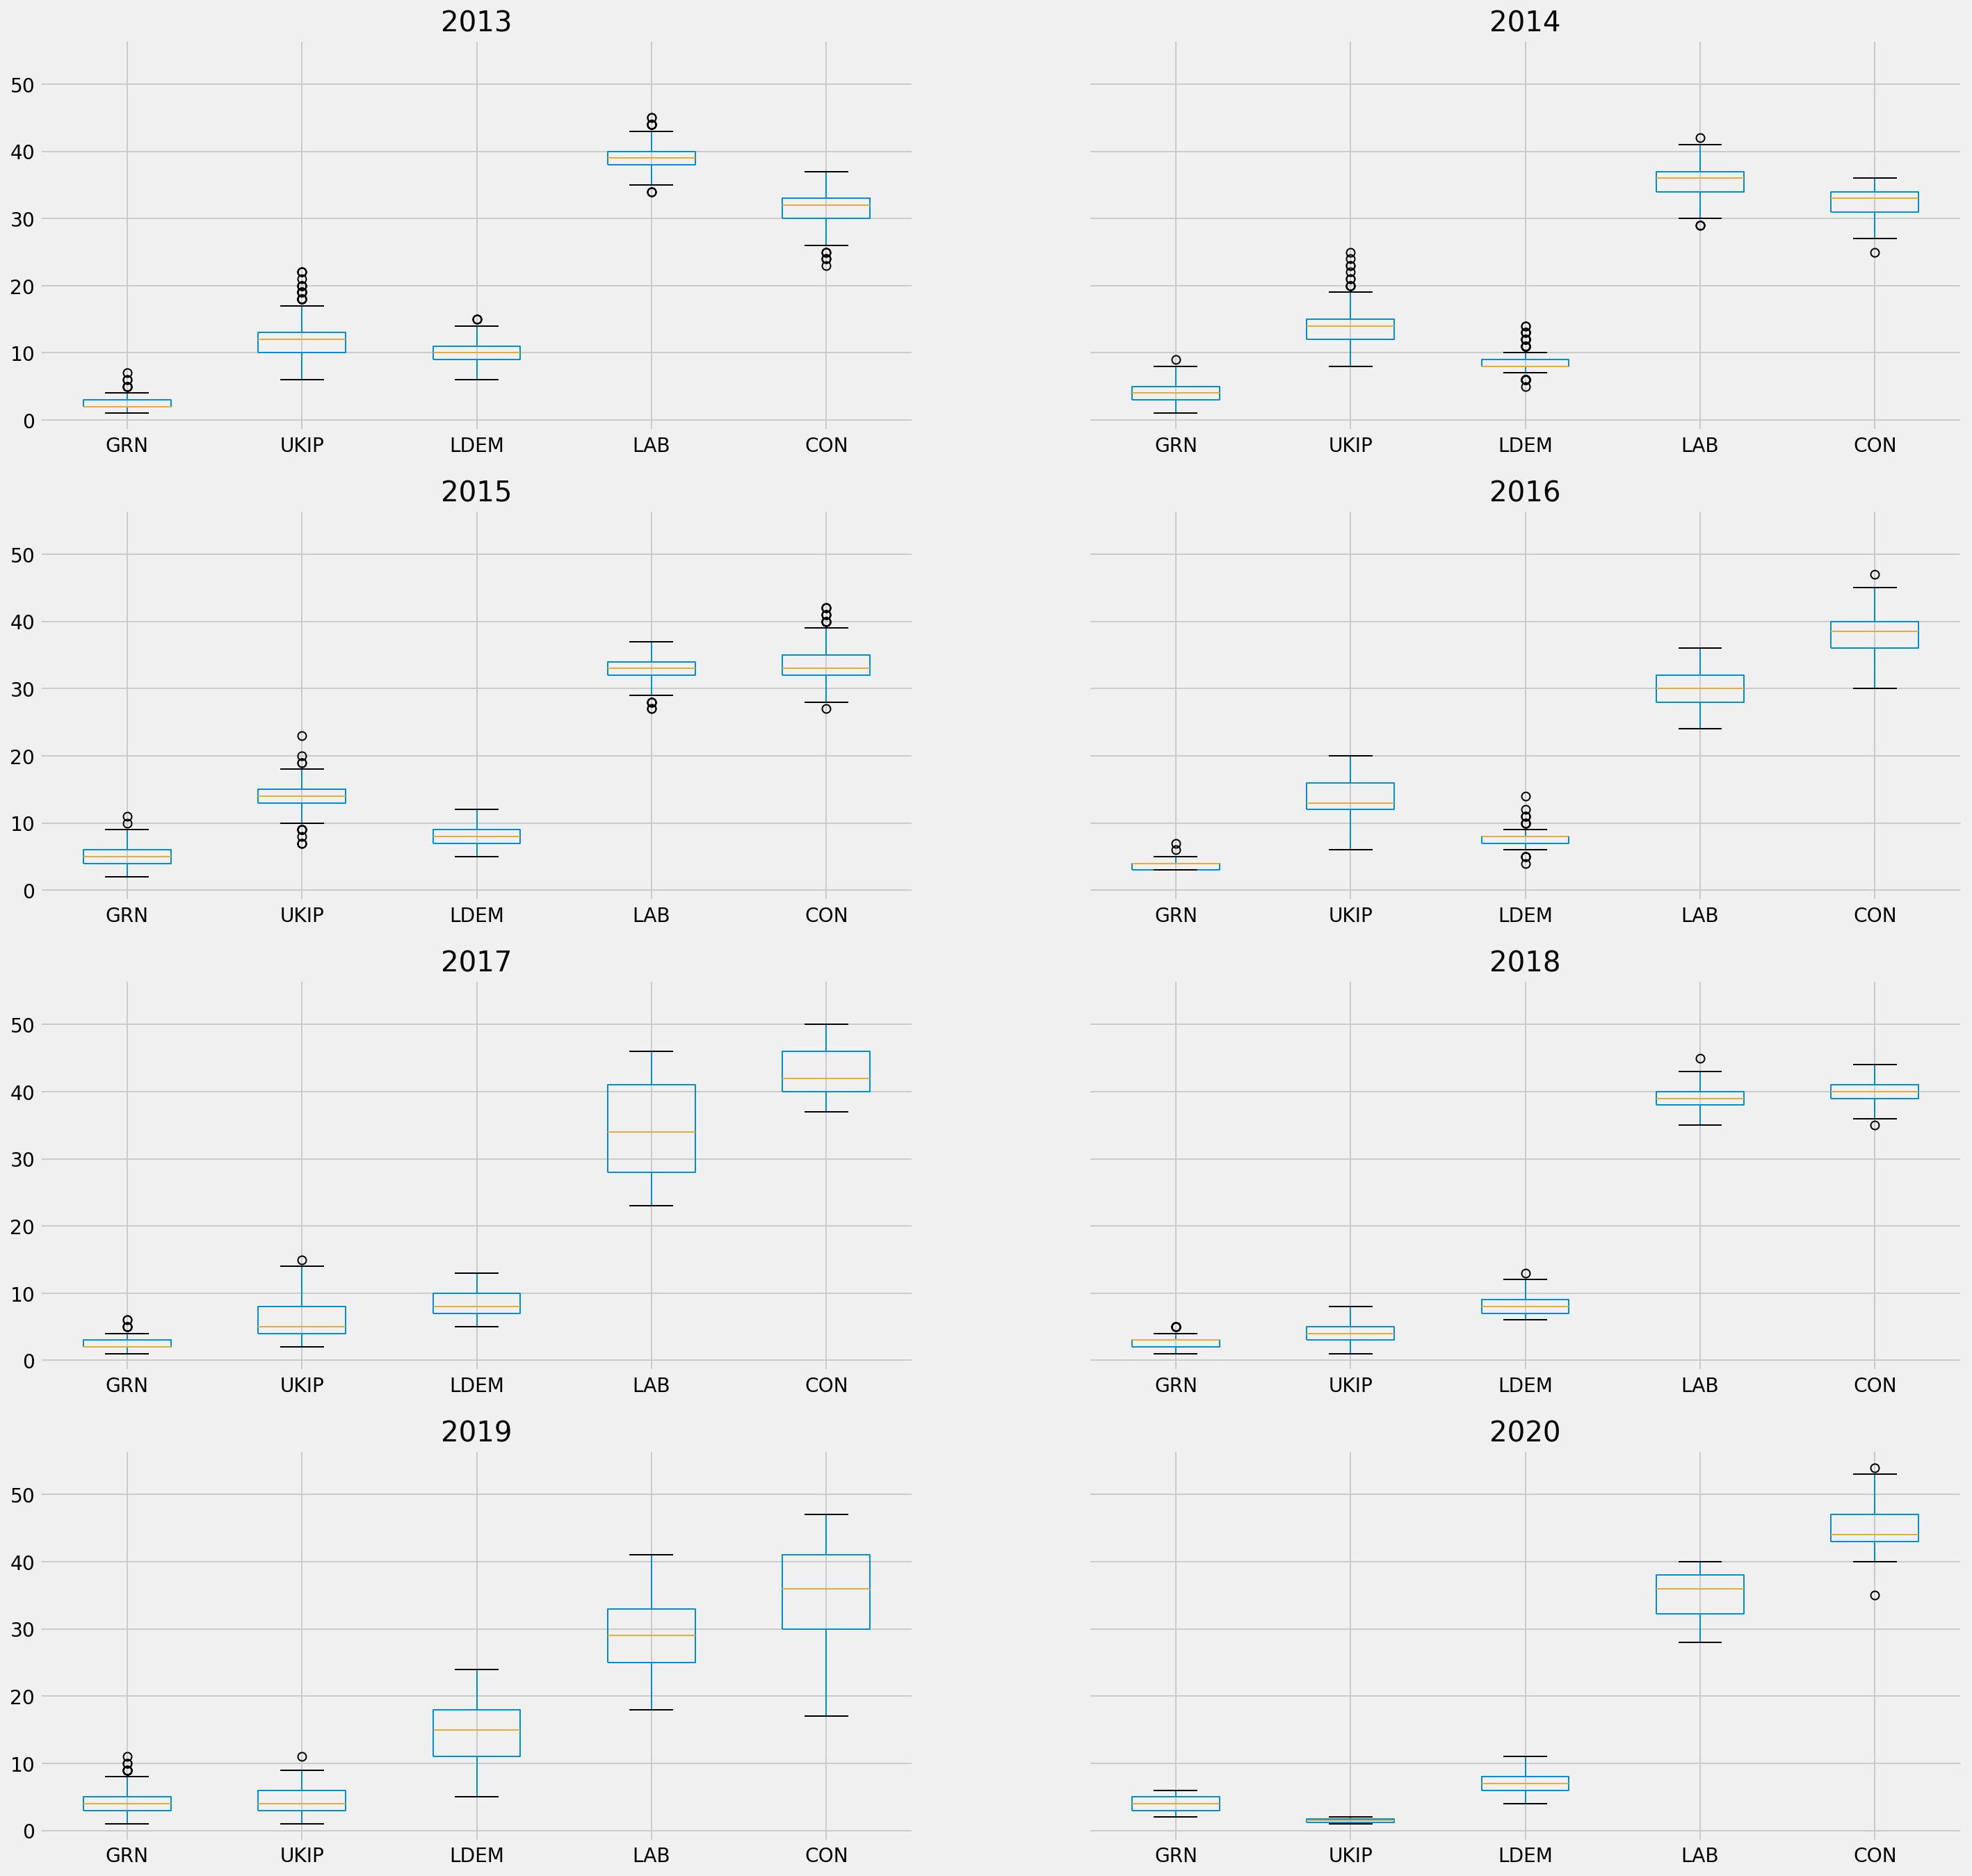

In [28]:
tmp = df[df.index.year >= 2013][["GRN", "UKIP", "LDEM", "LAB", "CON"]]
tmp.groupby(tmp.index.year).boxplot(figsize=(24, 24), layout=(4, 2));

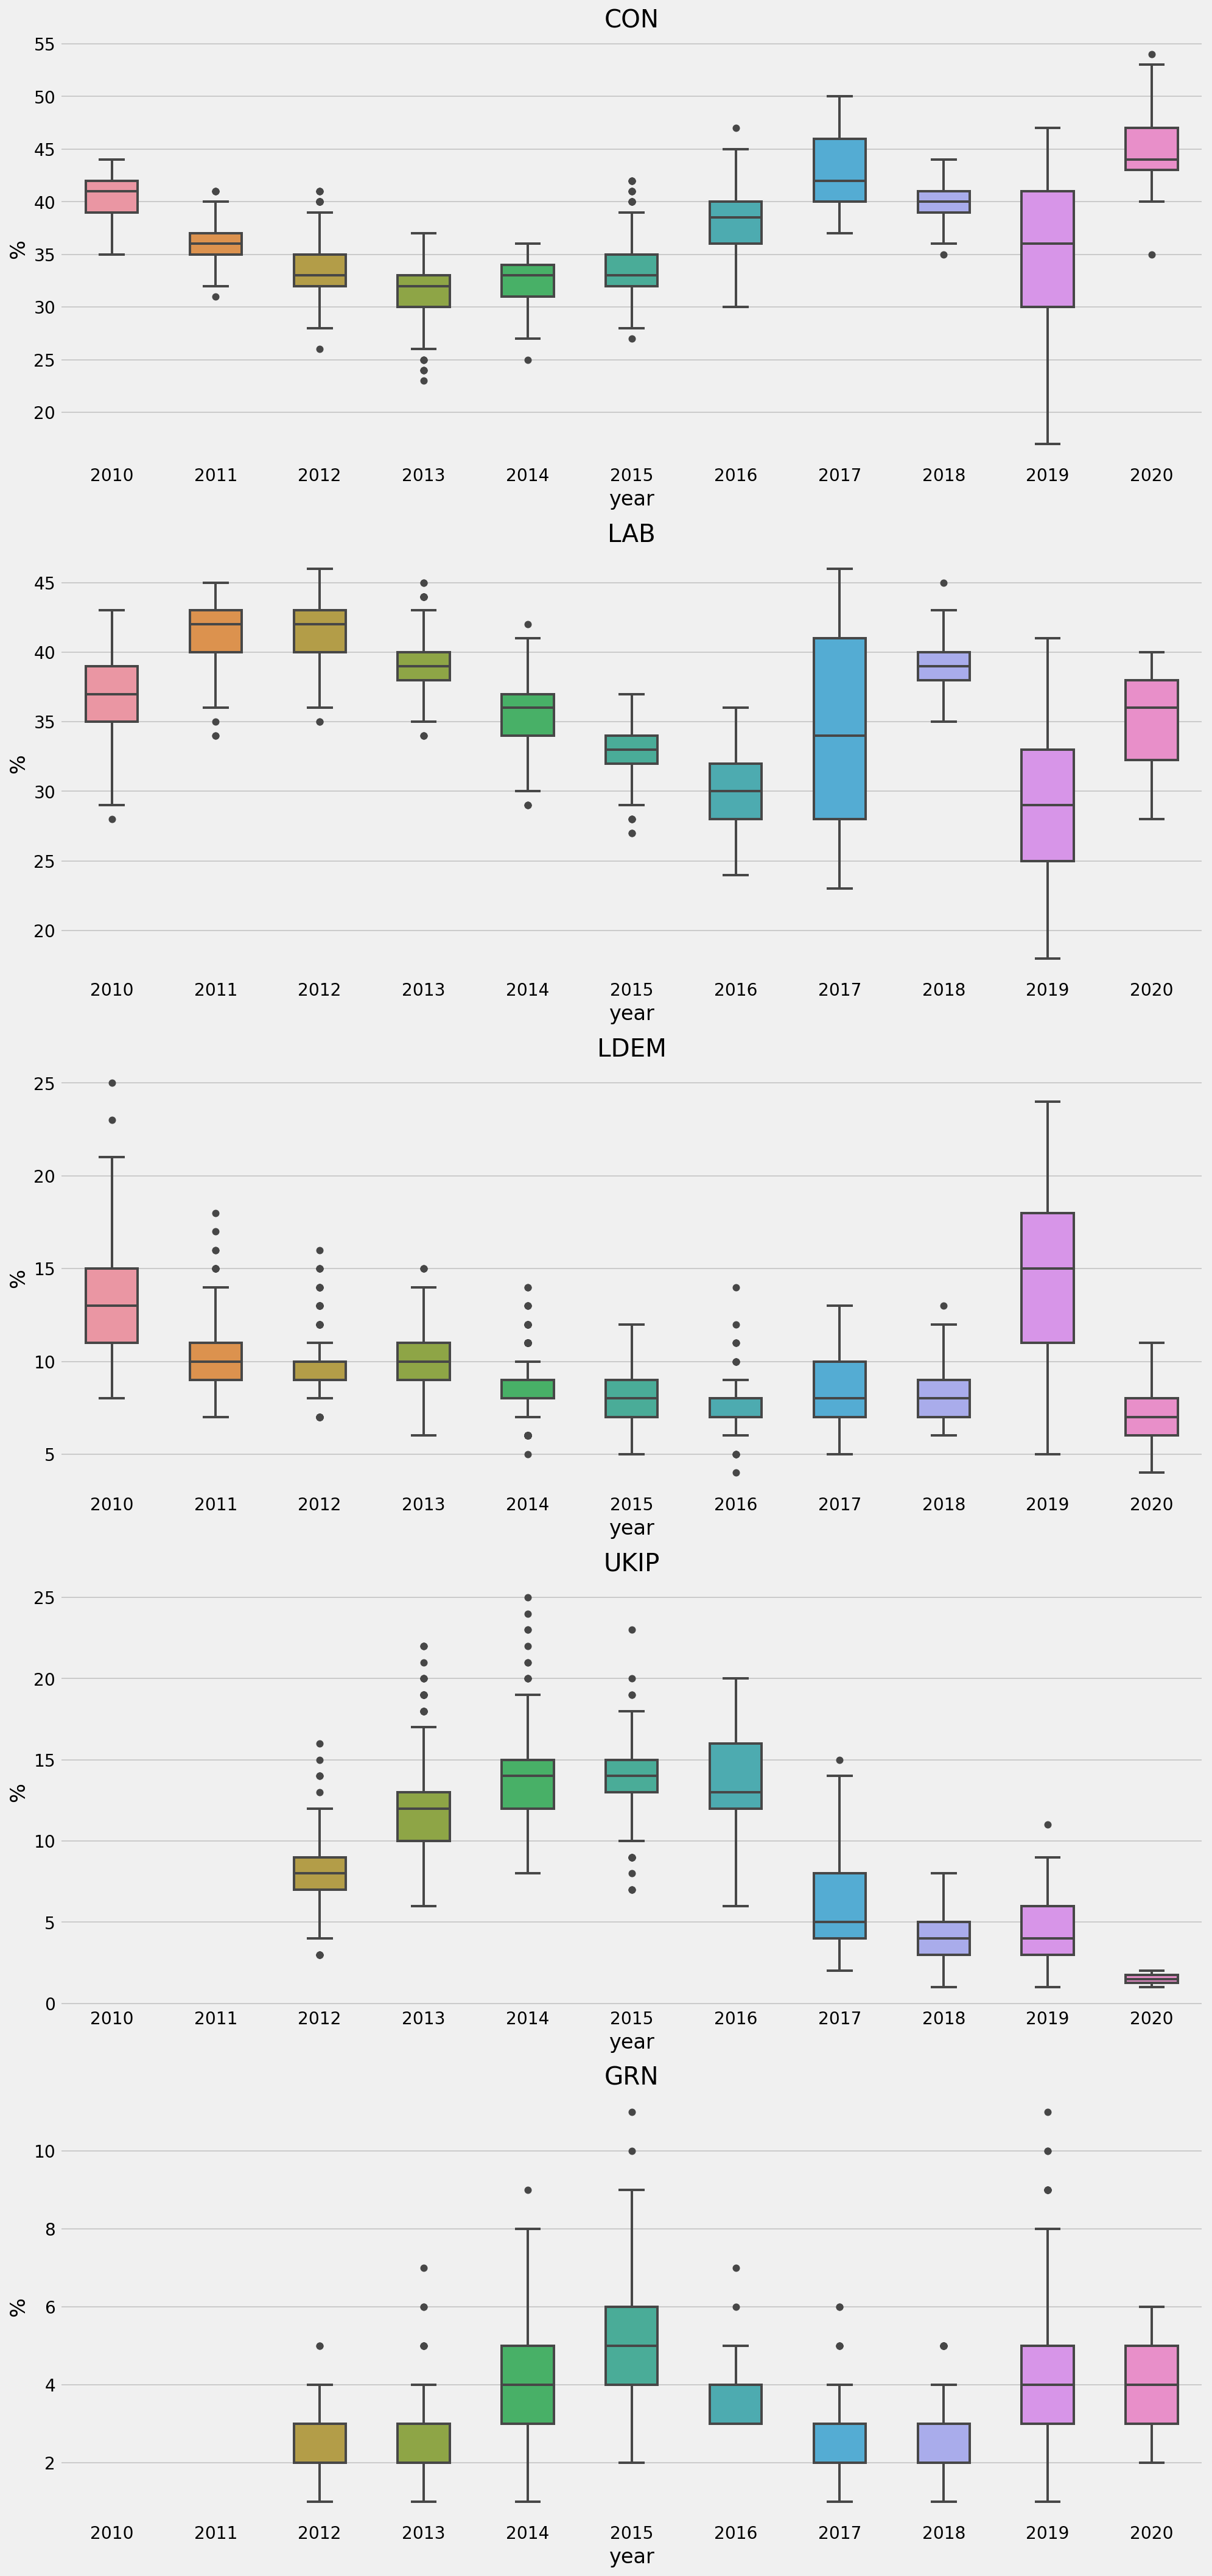

In [29]:
boxprops = {"linewidth": 2}
medianprops = {"linewidth": 2}
whiskerprops = {"linewidth": 2}
capprops = {"linewidth": 2}
flierprops = {"marker": "o"}
fig, axes = plt.subplots(5, 1, figsize=(15, 35))
for party, ax in zip(['CON', 'LAB', 'LDEM', 'UKIP', 'GRN'], axes):
    sns.boxplot(data=df.assign(year=df.index.year), x='year', y=party, width=0.5, ax=ax,
                boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(party)
    ax.set_ylabel("%")

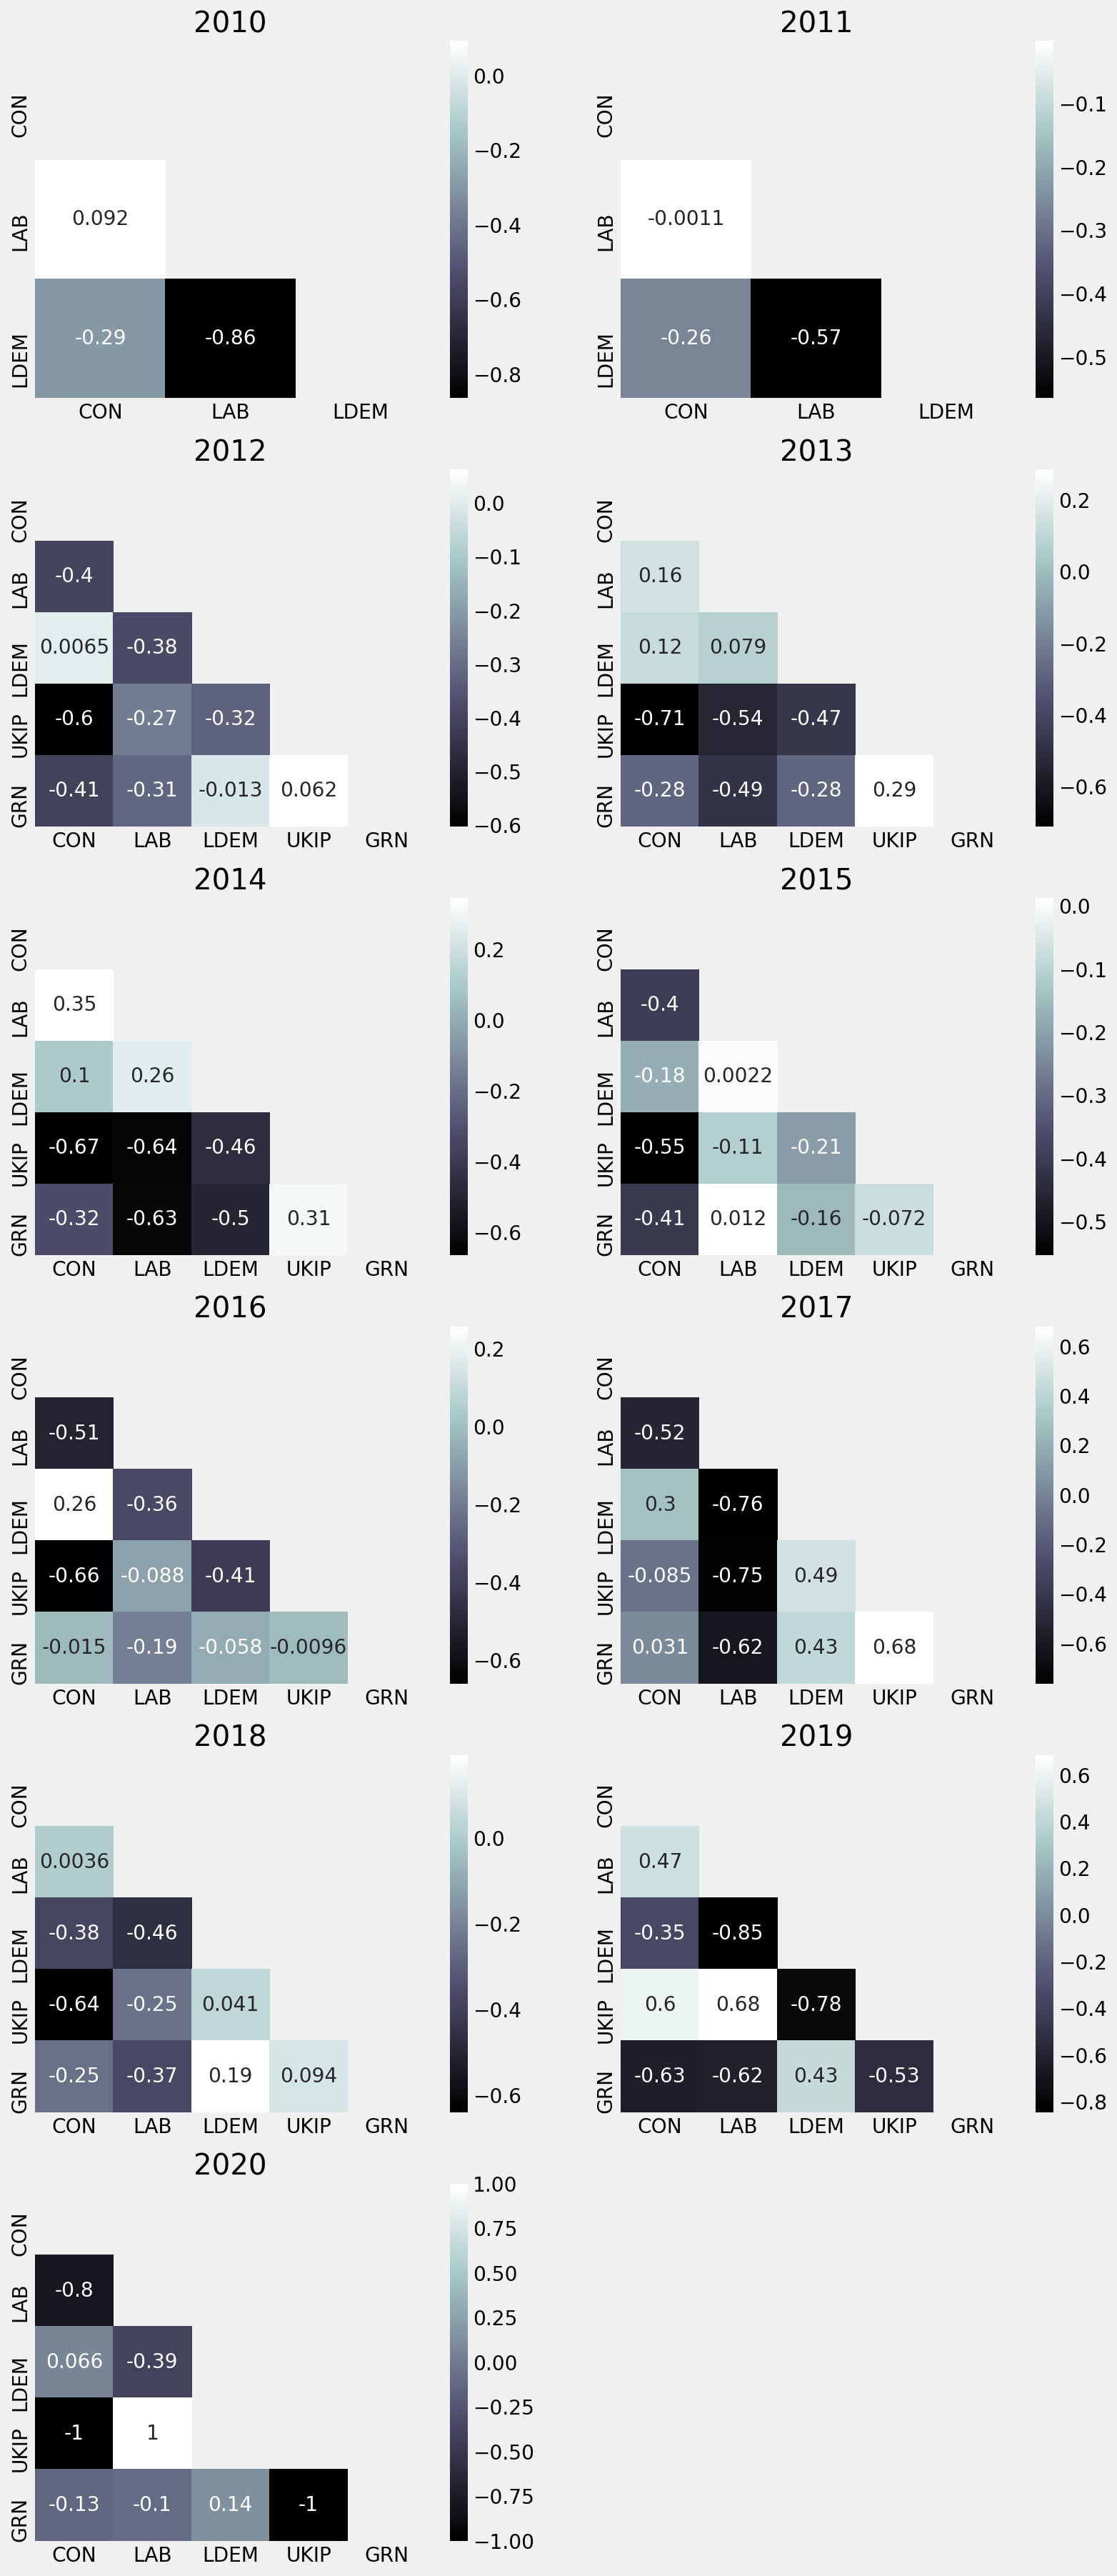

In [30]:
correlations = df.groupby(df.index.year)[['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr().transpose()
fig, axes = plt.subplots(6, 2, figsize=(12, 30))
for year, (i, j) in zip(df.index.year.unique(), product(range(6), range(2))):
    corr = (correlations[year]
            .dropna(how="all", axis="rows")
            .dropna(how="all", axis="columns"))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr,
                annot=True,
                ax=axes[i][j],
                mask=mask,
                cmap='bone')
    axes[i][j].set_title(year)
axes[5, 1].remove() 

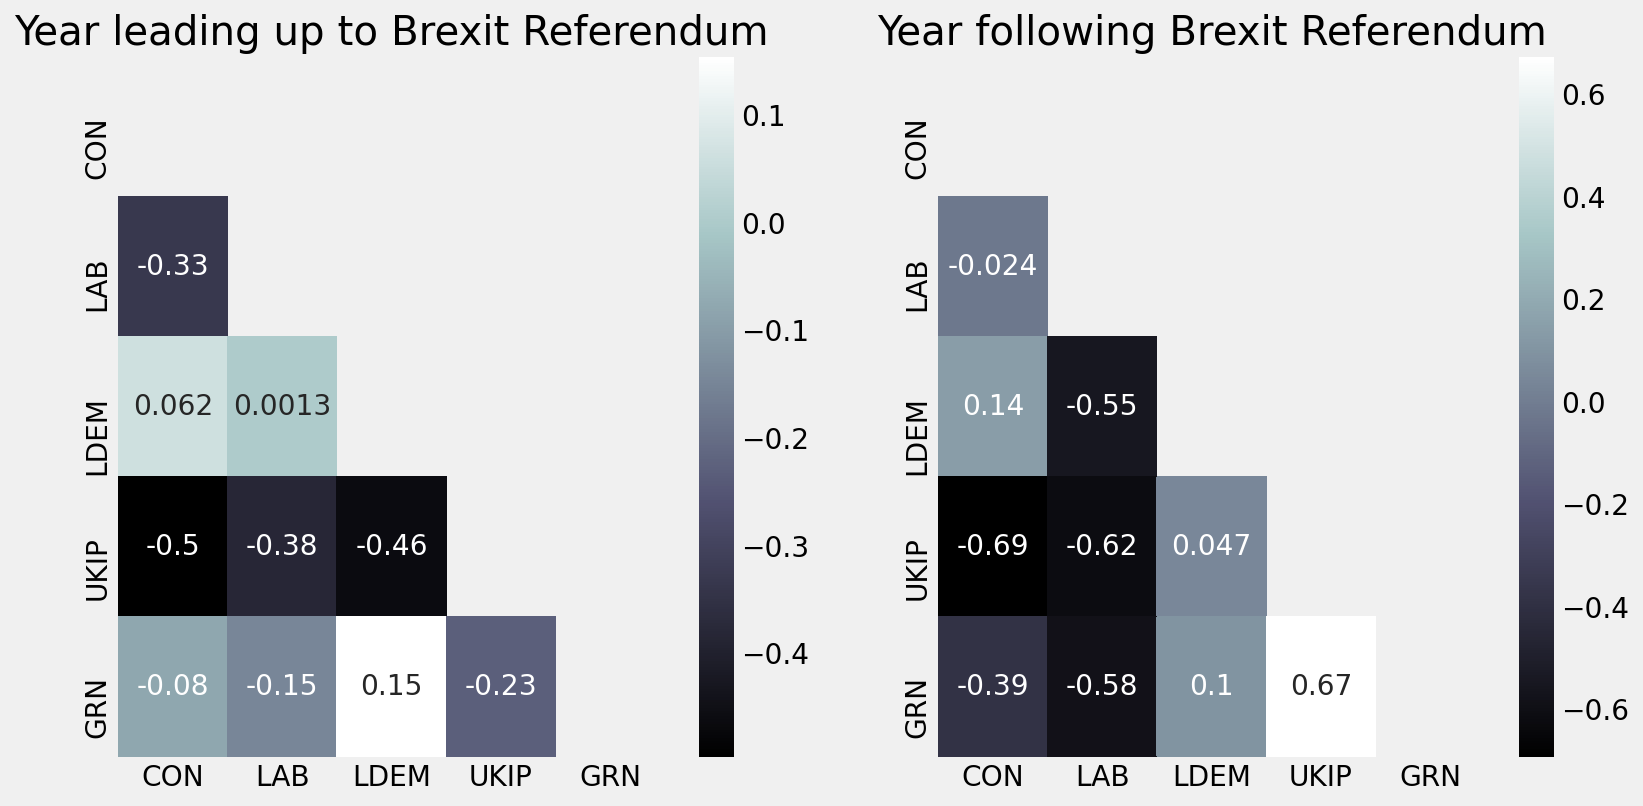

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
corr = df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2016"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax1,
            mask=mask,
            cmap='bone')
ax1.set_title("Year leading up to Brexit Referendum")
corr = df[(df.index >= pd.to_datetime("23 June 2016")) & (df.index <= pd.to_datetime("23 June 2017"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax2,
            mask=mask,
            cmap='bone')
ax2.set_title("Year following Brexit Referendum");

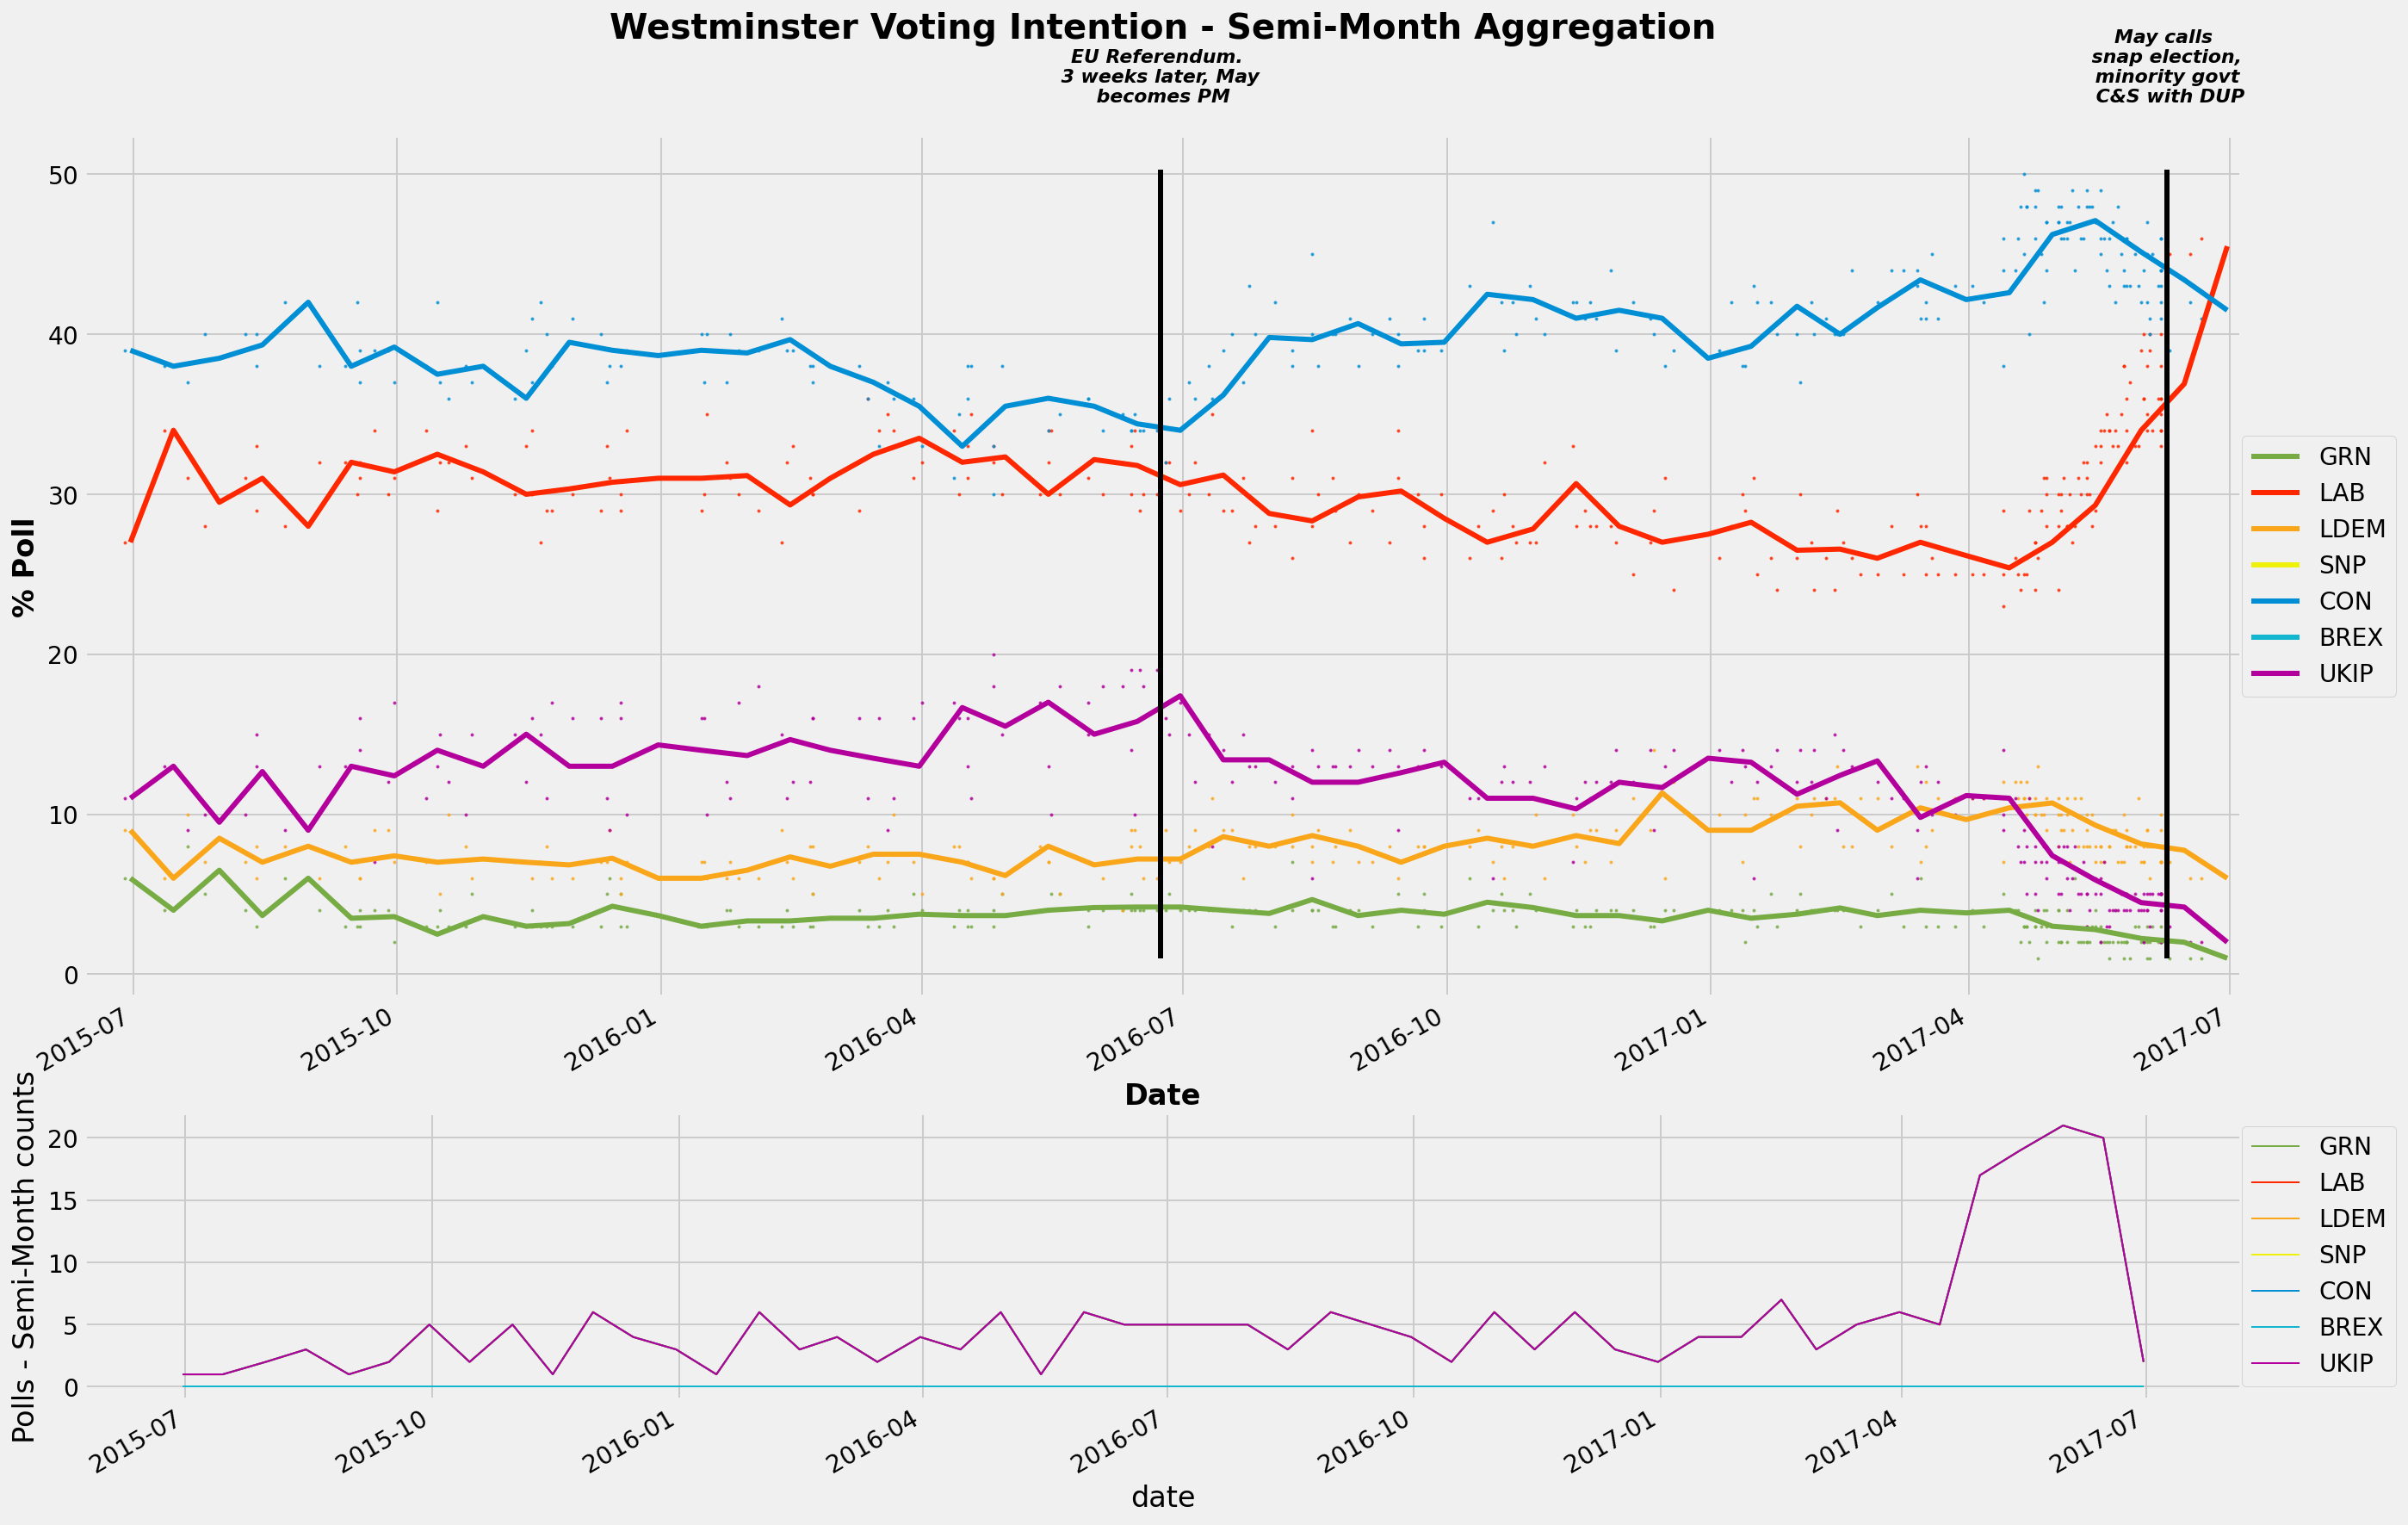

In [32]:
fig, ax = plot_vote_intention(df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2017"))], agg="SM", add_lifetime_context=True)
ax.texts = [text_obj for text_obj in ax.texts
 if (text_obj._x >= pd.to_datetime("23 June 2015")) & (text_obj._x <= pd.to_datetime("23 June 2017"))]